In [ ]:
# Example: Load from CSV
df = pd.read_csv("/content/bquxjob_2985a805_1986e478710.csv")

# Drop rows with missing values
df = df.dropna(subset=['trip_distance', 'fare_amount', 'payment_type'])

# Optional: filter outliers
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0) & (df['trip_distance'] < 50)]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
features = ['trip_distance', 'pickup_hour', 'payment_type']
target = 'fare_amount'

X = df[features]
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", round(r2, 3))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))


R² score: 0.693
MAE: 3.78
RMSE: 8.18


In [ ]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coeff_df)


         Feature  Coefficient
0  trip_distance     2.983376
1    pickup_hour     0.062494
2   payment_type    -1.420890


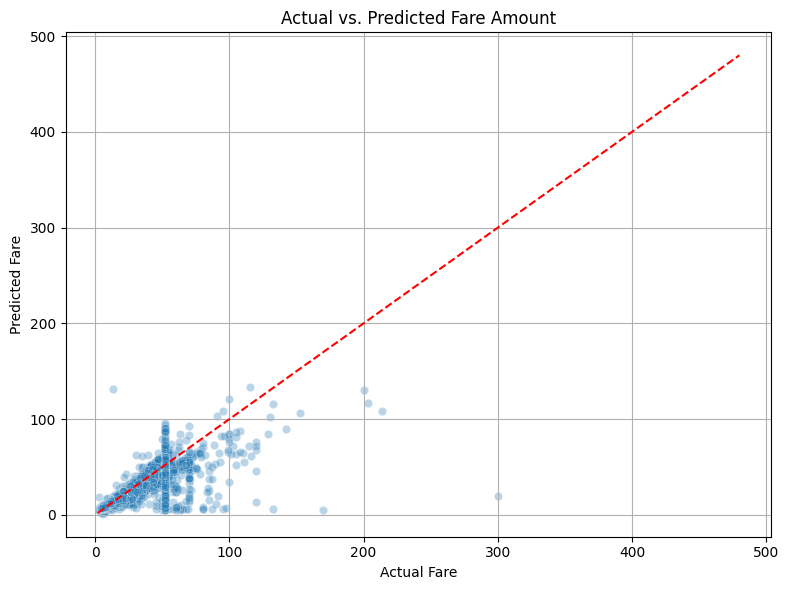

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted Fare Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest RMSE: 76.57118239298693
Random Forest R2: 0.6481566592108697


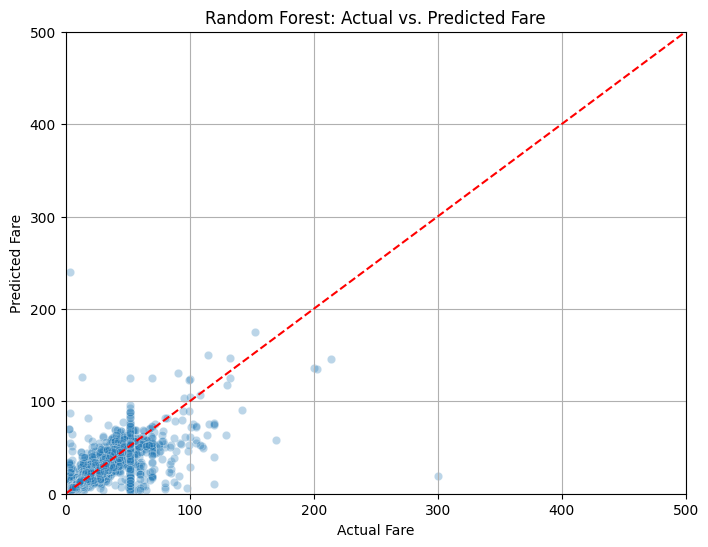

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([0, 500], [0, 500], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs. Predicted Fare")
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.grid(True)
plt.show()


In [ ]:
df.head()

,trip_distance,pickup_hour,payment_type,fare_amount,tip_amount,tolls_amount,total_amount
0,0.60,0,1,5.0,1.89,0.0,8.19
1,0.77,0,1,5.0,1.10,0.0,7.10
2,0.90,0,1,5.0,1.26,0.0,7.56
3,0.73,0,1,4.5,1.74,0.0,7.54
4,1.00,0,1,7.0,1.65,0.0,9.95


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your cleaned DataFrame with pickup_zone and dropoff_zone
categorical_cols = ['pickup_zone']
numeric_cols = ['trip_distance', 'pickup_hour', 'payment_type']
target = 'fare_amount'

# Encode categorical locations
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_zones = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_zones, columns=encoder.get_feature_names_out(categorical_cols))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# Combine all features
X = pd.concat([df[numeric_cols].reset_index(drop=True), encoded_df], axis=1)
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Feature importance
xgb.plot_importance(model, max_num_features=15)
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


RMSE: 7.899174958152676
R²: 0.7179877956717832
MAE: 3.1541087893817656


TypeError: got an unexpected keyword argument 'squared'

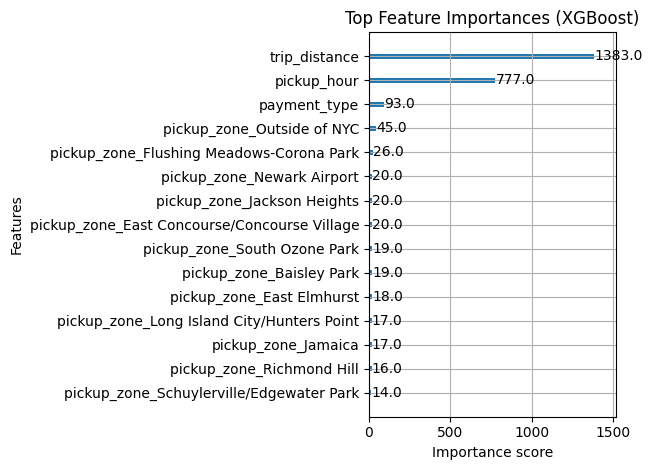

In [ ]:
# Feature importance
xgb.plot_importance(model, max_num_features=15)
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

model.save_model("xgb_fare_model.json")

loaded_model = xgb.XGBRegressor()
loaded_model.load_model("xgb_fare_model.json")

y_pred = loaded_model.predict(X_test)

In [ ]:
pickup_zone_avg = df.groupby("pickup_zone").mean().reset_index()

# 2. Encode features and predict
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[["pickup_zone", "pickup_hour", "trip_distance", "payment_type"]])
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

# Predict
model = xgb.XGBRegressor()
model.load_model("xgb_fare_model.json")  # or use your trained object directly
df["predicted_fare"] = model.predict(X)

# 3. Group predictions by pickup zone
fare_by_zone = df.groupby("pickup_zone")["predicted_fare"].mean().reset_index()

# 4. Load NYC Taxi Zones shapefile (GeoJSON is best)
zones = gpd.read_file("taxi_zones.geojson")

# 5. Merge predictions with GeoDataFrame
zones = zones.merge(fare_by_zone, left_on="zone", right_on="pickup_zone")

# 6. Plot heatmap using GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
zones.plot(column="predicted_fare", ax=ax, legend=True, cmap="OrRd", edgecolor='black')
ax.set_title("Predicted Average Fare by Pickup Zone (XGBoost)", fontsize=16)
plt.axis('off')
plt.show()

ValueError: feature_names mismatch: ['trip_distance', 'pickup_hour', 'payment_type', 'pickup_zone_Allerton/Pelham Gardens', 'pickup_zone_Alphabet City', 'pickup_zone_Arrochar/Fort Wadsworth', 'pickup_zone_Astoria', 'pickup_zone_Astoria Park', 'pickup_zone_Auburndale', 'pickup_zone_Baisley Park', 'pickup_zone_Bath Beach', 'pickup_zone_Battery Park', 'pickup_zone_Battery Park City', 'pickup_zone_Bay Ridge', 'pickup_zone_Bay Terrace/Fort Totten', 'pickup_zone_Bayside', 'pickup_zone_Bedford', 'pickup_zone_Bedford Park', 'pickup_zone_Bellerose', 'pickup_zone_Belmont', 'pickup_zone_Bensonhurst East', 'pickup_zone_Bensonhurst West', 'pickup_zone_Bloomingdale', 'pickup_zone_Boerum Hill', 'pickup_zone_Borough Park', 'pickup_zone_Briarwood/Jamaica Hills', 'pickup_zone_Brighton Beach', 'pickup_zone_Bronx Park', 'pickup_zone_Bronxdale', 'pickup_zone_Brooklyn Heights', 'pickup_zone_Brooklyn Navy Yard', 'pickup_zone_Brownsville', 'pickup_zone_Bushwick North', 'pickup_zone_Bushwick South', 'pickup_zone_Cambria Heights', 'pickup_zone_Canarsie', 'pickup_zone_Carroll Gardens', 'pickup_zone_Central Harlem', 'pickup_zone_Central Harlem North', 'pickup_zone_Central Park', 'pickup_zone_Charleston/Tottenville', 'pickup_zone_Chinatown', 'pickup_zone_Claremont/Bathgate', 'pickup_zone_Clinton Hill', 'pickup_zone_Co-Op City', 'pickup_zone_Cobble Hill', 'pickup_zone_College Point', 'pickup_zone_Columbia Street', 'pickup_zone_Coney Island', 'pickup_zone_Corona', 'pickup_zone_Crotona Park East', 'pickup_zone_Crown Heights North', 'pickup_zone_Crown Heights South', 'pickup_zone_Cypress Hills', 'pickup_zone_DUMBO/Vinegar Hill', 'pickup_zone_Douglaston', 'pickup_zone_Downtown Brooklyn/MetroTech', 'pickup_zone_Dyker Heights', 'pickup_zone_East Concourse/Concourse Village', 'pickup_zone_East Elmhurst', 'pickup_zone_East Flatbush/Farragut', 'pickup_zone_East Flatbush/Remsen Village', 'pickup_zone_East Flushing', 'pickup_zone_East Harlem North', 'pickup_zone_East New York', 'pickup_zone_East New York/Pennsylvania Avenue', 'pickup_zone_East Tremont', 'pickup_zone_East Williamsburg', 'pickup_zone_Eastchester', 'pickup_zone_Elmhurst', 'pickup_zone_Elmhurst/Maspeth', 'pickup_zone_Erasmus', 'pickup_zone_Far Rockaway', 'pickup_zone_Financial District South', 'pickup_zone_Flatbush/Ditmas Park', 'pickup_zone_Flatlands', 'pickup_zone_Flushing', 'pickup_zone_Flushing Meadows-Corona Park', 'pickup_zone_Fordham South', 'pickup_zone_Forest Hills', 'pickup_zone_Forest Park/Highland Park', 'pickup_zone_Fort Greene', 'pickup_zone_Fresh Meadows', 'pickup_zone_Glen Oaks', 'pickup_zone_Glendale', "pickup_zone_Governor's Island/Ellis Island/Liberty Island", 'pickup_zone_Gowanus', 'pickup_zone_Gravesend', 'pickup_zone_Green-Wood Cemetery', 'pickup_zone_Greenpoint', 'pickup_zone_Grymes Hill/Clifton', 'pickup_zone_Hamilton Heights', 'pickup_zone_Hammels/Arverne', 'pickup_zone_Heartland Village/Todt Hill', 'pickup_zone_Highbridge', 'pickup_zone_Highbridge Park', 'pickup_zone_Hillcrest/Pomonok', 'pickup_zone_Hollis', 'pickup_zone_Homecrest', 'pickup_zone_Howard Beach', 'pickup_zone_Hunts Point', 'pickup_zone_Inwood', 'pickup_zone_Inwood Hill Park', 'pickup_zone_Jackson Heights', 'pickup_zone_Jamaica', 'pickup_zone_Jamaica Estates', 'pickup_zone_Kensington', 'pickup_zone_Kew Gardens', 'pickup_zone_Kew Gardens Hills', 'pickup_zone_Kingsbridge Heights', 'pickup_zone_Laurelton', 'pickup_zone_Long Island City/Hunters Point', 'pickup_zone_Long Island City/Queens Plaza', 'pickup_zone_Longwood', 'pickup_zone_Madison', 'pickup_zone_Manhattan Beach', 'pickup_zone_Manhattanville', 'pickup_zone_Marble Hill', 'pickup_zone_Marine Park/Floyd Bennett Field', 'pickup_zone_Marine Park/Mill Basin', 'pickup_zone_Mariners Harbor', 'pickup_zone_Maspeth', 'pickup_zone_Melrose South', 'pickup_zone_Middle Village', 'pickup_zone_Midwood', 'pickup_zone_Morrisania/Melrose', 'pickup_zone_Mott Haven/Port Morris', 'pickup_zone_Mount Hope', 'pickup_zone_Murray Hill-Queens', 'pickup_zone_Newark Airport', 'pickup_zone_North Corona', 'pickup_zone_Norwood', 'pickup_zone_Ocean Hill', 'pickup_zone_Ocean Parkway South', 'pickup_zone_Old Astoria', 'pickup_zone_Outside of NYC', 'pickup_zone_Ozone Park', 'pickup_zone_Park Slope', 'pickup_zone_Parkchester', 'pickup_zone_Pelham Bay', 'pickup_zone_Pelham Bay Park', 'pickup_zone_Pelham Parkway', 'pickup_zone_Prospect Heights', 'pickup_zone_Prospect Park', 'pickup_zone_Prospect-Lefferts Gardens', 'pickup_zone_Queens Village', 'pickup_zone_Queensboro Hill', 'pickup_zone_Queensbridge/Ravenswood', 'pickup_zone_Randalls Island', 'pickup_zone_Red Hook', 'pickup_zone_Rego Park', 'pickup_zone_Richmond Hill', 'pickup_zone_Ridgewood', 'pickup_zone_Rikers Island', 'pickup_zone_Riverdale/North Riverdale/Fieldston', 'pickup_zone_Rockaway Park', 'pickup_zone_Roosevelt Island', 'pickup_zone_Rosedale', 'pickup_zone_Saint Albans', 'pickup_zone_Saint George/New Brighton', 'pickup_zone_Saint Michaels Cemetery/Woodside', 'pickup_zone_Schuylerville/Edgewater Park', 'pickup_zone_Seaport', 'pickup_zone_Sheepshead Bay', 'pickup_zone_Soundview/Bruckner', 'pickup_zone_Soundview/Castle Hill', 'pickup_zone_South Beach/Dongan Hills', 'pickup_zone_South Jamaica', 'pickup_zone_South Ozone Park', 'pickup_zone_South Williamsburg', 'pickup_zone_Springfield Gardens North', 'pickup_zone_Springfield Gardens South', 'pickup_zone_Spuyten Duyvil/Kingsbridge', 'pickup_zone_Starrett City', 'pickup_zone_Steinway', 'pickup_zone_Stuy Town/Peter Cooper Village', 'pickup_zone_Stuyvesant Heights', 'pickup_zone_Sunnyside', 'pickup_zone_Sunset Park East', 'pickup_zone_Sunset Park West', 'pickup_zone_Two Bridges/Seward Park', 'pickup_zone_University Heights/Morris Heights', 'pickup_zone_Van Cortlandt Village', 'pickup_zone_Van Nest/Morris Park', 'pickup_zone_Washington Heights North', 'pickup_zone_Washington Heights South', 'pickup_zone_West Brighton', 'pickup_zone_West Concourse', 'pickup_zone_West Farms/Bronx River', 'pickup_zone_Westchester Village/Unionport', 'pickup_zone_Westerleigh', 'pickup_zone_Whitestone', 'pickup_zone_Willets Point', 'pickup_zone_Williamsbridge/Olinville', 'pickup_zone_Williamsburg (North Side)', 'pickup_zone_Williamsburg (South Side)', 'pickup_zone_Windsor Terrace', 'pickup_zone_Woodhaven', 'pickup_zone_Woodlawn/Wakefield', 'pickup_zone_Woodside'] ['pickup_zone_Allerton/Pelham Gardens', 'pickup_zone_Alphabet City', 'pickup_zone_Arrochar/Fort Wadsworth', 'pickup_zone_Astoria', 'pickup_zone_Astoria Park', 'pickup_zone_Auburndale', 'pickup_zone_Baisley Park', 'pickup_zone_Bath Beach', 'pickup_zone_Battery Park', 'pickup_zone_Battery Park City', 'pickup_zone_Bay Ridge', 'pickup_zone_Bay Terrace/Fort Totten', 'pickup_zone_Bayside', 'pickup_zone_Bedford', 'pickup_zone_Bedford Park', 'pickup_zone_Bellerose', 'pickup_zone_Belmont', 'pickup_zone_Bensonhurst East', 'pickup_zone_Bensonhurst West', 'pickup_zone_Bloomingdale', 'pickup_zone_Boerum Hill', 'pickup_zone_Borough Park', 'pickup_zone_Briarwood/Jamaica Hills', 'pickup_zone_Brighton Beach', 'pickup_zone_Bronx Park', 'pickup_zone_Bronxdale', 'pickup_zone_Brooklyn Heights', 'pickup_zone_Brooklyn Navy Yard', 'pickup_zone_Brownsville', 'pickup_zone_Bushwick North', 'pickup_zone_Bushwick South', 'pickup_zone_Cambria Heights', 'pickup_zone_Canarsie', 'pickup_zone_Carroll Gardens', 'pickup_zone_Central Harlem', 'pickup_zone_Central Harlem North', 'pickup_zone_Central Park', 'pickup_zone_Charleston/Tottenville', 'pickup_zone_Chinatown', 'pickup_zone_Claremont/Bathgate', 'pickup_zone_Clinton Hill', 'pickup_zone_Co-Op City', 'pickup_zone_Cobble Hill', 'pickup_zone_College Point', 'pickup_zone_Columbia Street', 'pickup_zone_Coney Island', 'pickup_zone_Corona', 'pickup_zone_Crotona Park East', 'pickup_zone_Crown Heights North', 'pickup_zone_Crown Heights South', 'pickup_zone_Cypress Hills', 'pickup_zone_DUMBO/Vinegar Hill', 'pickup_zone_Douglaston', 'pickup_zone_Downtown Brooklyn/MetroTech', 'pickup_zone_Dyker Heights', 'pickup_zone_East Concourse/Concourse Village', 'pickup_zone_East Elmhurst', 'pickup_zone_East Flatbush/Farragut', 'pickup_zone_East Flatbush/Remsen Village', 'pickup_zone_East Flushing', 'pickup_zone_East Harlem North', 'pickup_zone_East New York', 'pickup_zone_East New York/Pennsylvania Avenue', 'pickup_zone_East Tremont', 'pickup_zone_East Williamsburg', 'pickup_zone_Eastchester', 'pickup_zone_Elmhurst', 'pickup_zone_Elmhurst/Maspeth', 'pickup_zone_Erasmus', 'pickup_zone_Far Rockaway', 'pickup_zone_Financial District South', 'pickup_zone_Flatbush/Ditmas Park', 'pickup_zone_Flatlands', 'pickup_zone_Flushing', 'pickup_zone_Flushing Meadows-Corona Park', 'pickup_zone_Fordham South', 'pickup_zone_Forest Hills', 'pickup_zone_Forest Park/Highland Park', 'pickup_zone_Fort Greene', 'pickup_zone_Fresh Meadows', 'pickup_zone_Glen Oaks', 'pickup_zone_Glendale', "pickup_zone_Governor's Island/Ellis Island/Liberty Island", 'pickup_zone_Gowanus', 'pickup_zone_Gravesend', 'pickup_zone_Green-Wood Cemetery', 'pickup_zone_Greenpoint', 'pickup_zone_Grymes Hill/Clifton', 'pickup_zone_Hamilton Heights', 'pickup_zone_Hammels/Arverne', 'pickup_zone_Heartland Village/Todt Hill', 'pickup_zone_Highbridge', 'pickup_zone_Highbridge Park', 'pickup_zone_Hillcrest/Pomonok', 'pickup_zone_Hollis', 'pickup_zone_Homecrest', 'pickup_zone_Howard Beach', 'pickup_zone_Hunts Point', 'pickup_zone_Inwood', 'pickup_zone_Inwood Hill Park', 'pickup_zone_Jackson Heights', 'pickup_zone_Jamaica', 'pickup_zone_Jamaica Estates', 'pickup_zone_Kensington', 'pickup_zone_Kew Gardens', 'pickup_zone_Kew Gardens Hills', 'pickup_zone_Kingsbridge Heights', 'pickup_zone_Laurelton', 'pickup_zone_Long Island City/Hunters Point', 'pickup_zone_Long Island City/Queens Plaza', 'pickup_zone_Longwood', 'pickup_zone_Madison', 'pickup_zone_Manhattan Beach', 'pickup_zone_Manhattanville', 'pickup_zone_Marble Hill', 'pickup_zone_Marine Park/Floyd Bennett Field', 'pickup_zone_Marine Park/Mill Basin', 'pickup_zone_Mariners Harbor', 'pickup_zone_Maspeth', 'pickup_zone_Melrose South', 'pickup_zone_Middle Village', 'pickup_zone_Midwood', 'pickup_zone_Morrisania/Melrose', 'pickup_zone_Mott Haven/Port Morris', 'pickup_zone_Mount Hope', 'pickup_zone_Murray Hill-Queens', 'pickup_zone_Newark Airport', 'pickup_zone_North Corona', 'pickup_zone_Norwood', 'pickup_zone_Ocean Hill', 'pickup_zone_Ocean Parkway South', 'pickup_zone_Old Astoria', 'pickup_zone_Outside of NYC', 'pickup_zone_Ozone Park', 'pickup_zone_Park Slope', 'pickup_zone_Parkchester', 'pickup_zone_Pelham Bay', 'pickup_zone_Pelham Bay Park', 'pickup_zone_Pelham Parkway', 'pickup_zone_Prospect Heights', 'pickup_zone_Prospect Park', 'pickup_zone_Prospect-Lefferts Gardens', 'pickup_zone_Queens Village', 'pickup_zone_Queensboro Hill', 'pickup_zone_Queensbridge/Ravenswood', 'pickup_zone_Randalls Island', 'pickup_zone_Red Hook', 'pickup_zone_Rego Park', 'pickup_zone_Richmond Hill', 'pickup_zone_Ridgewood', 'pickup_zone_Rikers Island', 'pickup_zone_Riverdale/North Riverdale/Fieldston', 'pickup_zone_Rockaway Park', 'pickup_zone_Roosevelt Island', 'pickup_zone_Rosedale', 'pickup_zone_Saint Albans', 'pickup_zone_Saint George/New Brighton', 'pickup_zone_Saint Michaels Cemetery/Woodside', 'pickup_zone_Schuylerville/Edgewater Park', 'pickup_zone_Seaport', 'pickup_zone_Sheepshead Bay', 'pickup_zone_Soundview/Bruckner', 'pickup_zone_Soundview/Castle Hill', 'pickup_zone_South Beach/Dongan Hills', 'pickup_zone_South Jamaica', 'pickup_zone_South Ozone Park', 'pickup_zone_South Williamsburg', 'pickup_zone_Springfield Gardens North', 'pickup_zone_Springfield Gardens South', 'pickup_zone_Spuyten Duyvil/Kingsbridge', 'pickup_zone_Starrett City', 'pickup_zone_Steinway', 'pickup_zone_Stuy Town/Peter Cooper Village', 'pickup_zone_Stuyvesant Heights', 'pickup_zone_Sunnyside', 'pickup_zone_Sunset Park East', 'pickup_zone_Sunset Park West', 'pickup_zone_Two Bridges/Seward Park', 'pickup_zone_University Heights/Morris Heights', 'pickup_zone_Van Cortlandt Village', 'pickup_zone_Van Nest/Morris Park', 'pickup_zone_Washington Heights North', 'pickup_zone_Washington Heights South', 'pickup_zone_West Brighton', 'pickup_zone_West Concourse', 'pickup_zone_West Farms/Bronx River', 'pickup_zone_Westchester Village/Unionport', 'pickup_zone_Westerleigh', 'pickup_zone_Whitestone', 'pickup_zone_Willets Point', 'pickup_zone_Williamsbridge/Olinville', 'pickup_zone_Williamsburg (North Side)', 'pickup_zone_Williamsburg (South Side)', 'pickup_zone_Windsor Terrace', 'pickup_zone_Woodhaven', 'pickup_zone_Woodlawn/Wakefield', 'pickup_zone_Woodside', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22', 'pickup_hour_23', 'trip_distance_0.01', 'trip_distance_0.02', 'trip_distance_0.03', 'trip_distance_0.04', 'trip_distance_0.05', 'trip_distance_0.06', 'trip_distance_0.07', 'trip_distance_0.08', 'trip_distance_0.09', 'trip_distance_0.1', 'trip_distance_0.11', 'trip_distance_0.12', 'trip_distance_0.13', 'trip_distance_0.14', 'trip_distance_0.15', 'trip_distance_0.16', 'trip_distance_0.17', 'trip_distance_0.18', 'trip_distance_0.19', 'trip_distance_0.2', 'trip_distance_0.21', 'trip_distance_0.22', 'trip_distance_0.23', 'trip_distance_0.24', 'trip_distance_0.25', 'trip_distance_0.26', 'trip_distance_0.27', 'trip_distance_0.28', 'trip_distance_0.29', 'trip_distance_0.3', 'trip_distance_0.31', 'trip_distance_0.32', 'trip_distance_0.33', 'trip_distance_0.34', 'trip_distance_0.35', 'trip_distance_0.36', 'trip_distance_0.37', 'trip_distance_0.38', 'trip_distance_0.39', 'trip_distance_0.4', 'trip_distance_0.41', 'trip_distance_0.42', 'trip_distance_0.43', 'trip_distance_0.44', 'trip_distance_0.45', 'trip_distance_0.46', 'trip_distance_0.47', 'trip_distance_0.48', 'trip_distance_0.49', 'trip_distance_0.5', 'trip_distance_0.51', 'trip_distance_0.52', 'trip_distance_0.53', 'trip_distance_0.54', 'trip_distance_0.55', 'trip_distance_0.56', 'trip_distance_0.57', 'trip_distance_0.58', 'trip_distance_0.59', 'trip_distance_0.6', 'trip_distance_0.61', 'trip_distance_0.62', 'trip_distance_0.63', 'trip_distance_0.64', 'trip_distance_0.65', 'trip_distance_0.66', 'trip_distance_0.67', 'trip_distance_0.68', 'trip_distance_0.69', 'trip_distance_0.7', 'trip_distance_0.71', 'trip_distance_0.72', 'trip_distance_0.73', 'trip_distance_0.74', 'trip_distance_0.75', 'trip_distance_0.76', 'trip_distance_0.77', 'trip_distance_0.78', 'trip_distance_0.79', 'trip_distance_0.8', 'trip_distance_0.81', 'trip_distance_0.82', 'trip_distance_0.83', 'trip_distance_0.84', 'trip_distance_0.85', 'trip_distance_0.86', 'trip_distance_0.87', 'trip_distance_0.88', 'trip_distance_0.89', 'trip_distance_0.9', 'trip_distance_0.91', 'trip_distance_0.92', 'trip_distance_0.93', 'trip_distance_0.94', 'trip_distance_0.95', 'trip_distance_0.96', 'trip_distance_0.97', 'trip_distance_0.98', 'trip_distance_0.99', 'trip_distance_1.0', 'trip_distance_1.01', 'trip_distance_1.02', 'trip_distance_1.03', 'trip_distance_1.04', 'trip_distance_1.05', 'trip_distance_1.06', 'trip_distance_1.07', 'trip_distance_1.08', 'trip_distance_1.09', 'trip_distance_1.1', 'trip_distance_1.11', 'trip_distance_1.12', 'trip_distance_1.13', 'trip_distance_1.14', 'trip_distance_1.15', 'trip_distance_1.16', 'trip_distance_1.17', 'trip_distance_1.18', 'trip_distance_1.19', 'trip_distance_1.2', 'trip_distance_1.21', 'trip_distance_1.22', 'trip_distance_1.23', 'trip_distance_1.24', 'trip_distance_1.25', 'trip_distance_1.26', 'trip_distance_1.27', 'trip_distance_1.28', 'trip_distance_1.29', 'trip_distance_1.3', 'trip_distance_1.31', 'trip_distance_1.32', 'trip_distance_1.33', 'trip_distance_1.34', 'trip_distance_1.35', 'trip_distance_1.36', 'trip_distance_1.37', 'trip_distance_1.38', 'trip_distance_1.39', 'trip_distance_1.4', 'trip_distance_1.41', 'trip_distance_1.42', 'trip_distance_1.43', 'trip_distance_1.44', 'trip_distance_1.45', 'trip_distance_1.46', 'trip_distance_1.47', 'trip_distance_1.48', 'trip_distance_1.49', 'trip_distance_1.5', 'trip_distance_1.51', 'trip_distance_1.52', 'trip_distance_1.53', 'trip_distance_1.54', 'trip_distance_1.55', 'trip_distance_1.56', 'trip_distance_1.57', 'trip_distance_1.58', 'trip_distance_1.59', 'trip_distance_1.6', 'trip_distance_1.61', 'trip_distance_1.62', 'trip_distance_1.63', 'trip_distance_1.64', 'trip_distance_1.65', 'trip_distance_1.66', 'trip_distance_1.67', 'trip_distance_1.68', 'trip_distance_1.69', 'trip_distance_1.7', 'trip_distance_1.71', 'trip_distance_1.72', 'trip_distance_1.73', 'trip_distance_1.74', 'trip_distance_1.75', 'trip_distance_1.76', 'trip_distance_1.77', 'trip_distance_1.78', 'trip_distance_1.79', 'trip_distance_1.8', 'trip_distance_1.81', 'trip_distance_1.82', 'trip_distance_1.83', 'trip_distance_1.84', 'trip_distance_1.85', 'trip_distance_1.86', 'trip_distance_1.87', 'trip_distance_1.88', 'trip_distance_1.89', 'trip_distance_1.9', 'trip_distance_1.91', 'trip_distance_1.92', 'trip_distance_1.93', 'trip_distance_1.94', 'trip_distance_1.95', 'trip_distance_1.96', 'trip_distance_1.97', 'trip_distance_1.98', 'trip_distance_1.99', 'trip_distance_2.0', 'trip_distance_2.01', 'trip_distance_2.02', 'trip_distance_2.03', 'trip_distance_2.04', 'trip_distance_2.05', 'trip_distance_2.06', 'trip_distance_2.07', 'trip_distance_2.08', 'trip_distance_2.09', 'trip_distance_2.1', 'trip_distance_2.11', 'trip_distance_2.12', 'trip_distance_2.13', 'trip_distance_2.14', 'trip_distance_2.15', 'trip_distance_2.16', 'trip_distance_2.17', 'trip_distance_2.18', 'trip_distance_2.19', 'trip_distance_2.2', 'trip_distance_2.21', 'trip_distance_2.22', 'trip_distance_2.23', 'trip_distance_2.24', 'trip_distance_2.25', 'trip_distance_2.26', 'trip_distance_2.27', 'trip_distance_2.28', 'trip_distance_2.29', 'trip_distance_2.3', 'trip_distance_2.31', 'trip_distance_2.32', 'trip_distance_2.33', 'trip_distance_2.34', 'trip_distance_2.35', 'trip_distance_2.36', 'trip_distance_2.37', 'trip_distance_2.38', 'trip_distance_2.39', 'trip_distance_2.4', 'trip_distance_2.41', 'trip_distance_2.42', 'trip_distance_2.43', 'trip_distance_2.44', 'trip_distance_2.45', 'trip_distance_2.46', 'trip_distance_2.47', 'trip_distance_2.48', 'trip_distance_2.49', 'trip_distance_2.5', 'trip_distance_2.51', 'trip_distance_2.52', 'trip_distance_2.53', 'trip_distance_2.54', 'trip_distance_2.55', 'trip_distance_2.56', 'trip_distance_2.57', 'trip_distance_2.58', 'trip_distance_2.59', 'trip_distance_2.6', 'trip_distance_2.61', 'trip_distance_2.62', 'trip_distance_2.63', 'trip_distance_2.64', 'trip_distance_2.65', 'trip_distance_2.66', 'trip_distance_2.67', 'trip_distance_2.68', 'trip_distance_2.69', 'trip_distance_2.7', 'trip_distance_2.71', 'trip_distance_2.72', 'trip_distance_2.73', 'trip_distance_2.74', 'trip_distance_2.75', 'trip_distance_2.76', 'trip_distance_2.77', 'trip_distance_2.78', 'trip_distance_2.79', 'trip_distance_2.8', 'trip_distance_2.81', 'trip_distance_2.82', 'trip_distance_2.83', 'trip_distance_2.84', 'trip_distance_2.85', 'trip_distance_2.86', 'trip_distance_2.87', 'trip_distance_2.88', 'trip_distance_2.89', 'trip_distance_2.9', 'trip_distance_2.91', 'trip_distance_2.92', 'trip_distance_2.93', 'trip_distance_2.94', 'trip_distance_2.95', 'trip_distance_2.96', 'trip_distance_2.97', 'trip_distance_2.98', 'trip_distance_2.99', 'trip_distance_3.0', 'trip_distance_3.01', 'trip_distance_3.02', 'trip_distance_3.03', 'trip_distance_3.04', 'trip_distance_3.05', 'trip_distance_3.06', 'trip_distance_3.07', 'trip_distance_3.08', 'trip_distance_3.09', 'trip_distance_3.1', 'trip_distance_3.11', 'trip_distance_3.12', 'trip_distance_3.13', 'trip_distance_3.14', 'trip_distance_3.15', 'trip_distance_3.16', 'trip_distance_3.17', 'trip_distance_3.18', 'trip_distance_3.19', 'trip_distance_3.2', 'trip_distance_3.21', 'trip_distance_3.22', 'trip_distance_3.23', 'trip_distance_3.24', 'trip_distance_3.25', 'trip_distance_3.26', 'trip_distance_3.27', 'trip_distance_3.28', 'trip_distance_3.29', 'trip_distance_3.3', 'trip_distance_3.31', 'trip_distance_3.32', 'trip_distance_3.33', 'trip_distance_3.34', 'trip_distance_3.35', 'trip_distance_3.36', 'trip_distance_3.37', 'trip_distance_3.38', 'trip_distance_3.39', 'trip_distance_3.4', 'trip_distance_3.41', 'trip_distance_3.42', 'trip_distance_3.43', 'trip_distance_3.44', 'trip_distance_3.45', 'trip_distance_3.46', 'trip_distance_3.47', 'trip_distance_3.48', 'trip_distance_3.49', 'trip_distance_3.5', 'trip_distance_3.51', 'trip_distance_3.52', 'trip_distance_3.53', 'trip_distance_3.54', 'trip_distance_3.55', 'trip_distance_3.56', 'trip_distance_3.57', 'trip_distance_3.58', 'trip_distance_3.59', 'trip_distance_3.6', 'trip_distance_3.61', 'trip_distance_3.62', 'trip_distance_3.63', 'trip_distance_3.64', 'trip_distance_3.65', 'trip_distance_3.66', 'trip_distance_3.67', 'trip_distance_3.68', 'trip_distance_3.69', 'trip_distance_3.7', 'trip_distance_3.71', 'trip_distance_3.72', 'trip_distance_3.73', 'trip_distance_3.74', 'trip_distance_3.75', 'trip_distance_3.76', 'trip_distance_3.77', 'trip_distance_3.78', 'trip_distance_3.79', 'trip_distance_3.8', 'trip_distance_3.81', 'trip_distance_3.82', 'trip_distance_3.83', 'trip_distance_3.84', 'trip_distance_3.85', 'trip_distance_3.86', 'trip_distance_3.87', 'trip_distance_3.88', 'trip_distance_3.89', 'trip_distance_3.9', 'trip_distance_3.91', 'trip_distance_3.92', 'trip_distance_3.93', 'trip_distance_3.94', 'trip_distance_3.95', 'trip_distance_3.96', 'trip_distance_3.97', 'trip_distance_3.98', 'trip_distance_3.99', 'trip_distance_4.0', 'trip_distance_4.01', 'trip_distance_4.02', 'trip_distance_4.03', 'trip_distance_4.04', 'trip_distance_4.05', 'trip_distance_4.06', 'trip_distance_4.07', 'trip_distance_4.08', 'trip_distance_4.09', 'trip_distance_4.1', 'trip_distance_4.11', 'trip_distance_4.12', 'trip_distance_4.13', 'trip_distance_4.14', 'trip_distance_4.15', 'trip_distance_4.16', 'trip_distance_4.17', 'trip_distance_4.18', 'trip_distance_4.19', 'trip_distance_4.2', 'trip_distance_4.21', 'trip_distance_4.22', 'trip_distance_4.23', 'trip_distance_4.24', 'trip_distance_4.25', 'trip_distance_4.26', 'trip_distance_4.27', 'trip_distance_4.28', 'trip_distance_4.29', 'trip_distance_4.3', 'trip_distance_4.31', 'trip_distance_4.32', 'trip_distance_4.33', 'trip_distance_4.34', 'trip_distance_4.35', 'trip_distance_4.36', 'trip_distance_4.37', 'trip_distance_4.38', 'trip_distance_4.39', 'trip_distance_4.4', 'trip_distance_4.41', 'trip_distance_4.42', 'trip_distance_4.43', 'trip_distance_4.44', 'trip_distance_4.45', 'trip_distance_4.46', 'trip_distance_4.47', 'trip_distance_4.48', 'trip_distance_4.49', 'trip_distance_4.5', 'trip_distance_4.51', 'trip_distance_4.52', 'trip_distance_4.53', 'trip_distance_4.54', 'trip_distance_4.55', 'trip_distance_4.56', 'trip_distance_4.57', 'trip_distance_4.58', 'trip_distance_4.59', 'trip_distance_4.6', 'trip_distance_4.61', 'trip_distance_4.62', 'trip_distance_4.63', 'trip_distance_4.64', 'trip_distance_4.65', 'trip_distance_4.66', 'trip_distance_4.67', 'trip_distance_4.68', 'trip_distance_4.69', 'trip_distance_4.7', 'trip_distance_4.71', 'trip_distance_4.72', 'trip_distance_4.73', 'trip_distance_4.74', 'trip_distance_4.75', 'trip_distance_4.76', 'trip_distance_4.77', 'trip_distance_4.78', 'trip_distance_4.79', 'trip_distance_4.8', 'trip_distance_4.81', 'trip_distance_4.82', 'trip_distance_4.83', 'trip_distance_4.84', 'trip_distance_4.85', 'trip_distance_4.86', 'trip_distance_4.87', 'trip_distance_4.88', 'trip_distance_4.89', 'trip_distance_4.9', 'trip_distance_4.91', 'trip_distance_4.92', 'trip_distance_4.93', 'trip_distance_4.94', 'trip_distance_4.95', 'trip_distance_4.96', 'trip_distance_4.97', 'trip_distance_4.98', 'trip_distance_4.99', 'trip_distance_5.0', 'trip_distance_5.01', 'trip_distance_5.02', 'trip_distance_5.03', 'trip_distance_5.04', 'trip_distance_5.05', 'trip_distance_5.06', 'trip_distance_5.07', 'trip_distance_5.08', 'trip_distance_5.09', 'trip_distance_5.1', 'trip_distance_5.11', 'trip_distance_5.12', 'trip_distance_5.13', 'trip_distance_5.14', 'trip_distance_5.15', 'trip_distance_5.16', 'trip_distance_5.17', 'trip_distance_5.18', 'trip_distance_5.19', 'trip_distance_5.2', 'trip_distance_5.21', 'trip_distance_5.22', 'trip_distance_5.23', 'trip_distance_5.24', 'trip_distance_5.25', 'trip_distance_5.26', 'trip_distance_5.27', 'trip_distance_5.28', 'trip_distance_5.29', 'trip_distance_5.3', 'trip_distance_5.31', 'trip_distance_5.32', 'trip_distance_5.33', 'trip_distance_5.34', 'trip_distance_5.35', 'trip_distance_5.36', 'trip_distance_5.37', 'trip_distance_5.38', 'trip_distance_5.39', 'trip_distance_5.4', 'trip_distance_5.41', 'trip_distance_5.42', 'trip_distance_5.43', 'trip_distance_5.44', 'trip_distance_5.45', 'trip_distance_5.46', 'trip_distance_5.47', 'trip_distance_5.48', 'trip_distance_5.49', 'trip_distance_5.5', 'trip_distance_5.51', 'trip_distance_5.52', 'trip_distance_5.53', 'trip_distance_5.54', 'trip_distance_5.55', 'trip_distance_5.56', 'trip_distance_5.57', 'trip_distance_5.58', 'trip_distance_5.59', 'trip_distance_5.6', 'trip_distance_5.61', 'trip_distance_5.62', 'trip_distance_5.63', 'trip_distance_5.64', 'trip_distance_5.65', 'trip_distance_5.66', 'trip_distance_5.67', 'trip_distance_5.68', 'trip_distance_5.69', 'trip_distance_5.7', 'trip_distance_5.71', 'trip_distance_5.72', 'trip_distance_5.73', 'trip_distance_5.74', 'trip_distance_5.75', 'trip_distance_5.76', 'trip_distance_5.77', 'trip_distance_5.78', 'trip_distance_5.79', 'trip_distance_5.8', 'trip_distance_5.81', 'trip_distance_5.82', 'trip_distance_5.83', 'trip_distance_5.84', 'trip_distance_5.85', 'trip_distance_5.86', 'trip_distance_5.87', 'trip_distance_5.88', 'trip_distance_5.89', 'trip_distance_5.9', 'trip_distance_5.91', 'trip_distance_5.92', 'trip_distance_5.93', 'trip_distance_5.94', 'trip_distance_5.95', 'trip_distance_5.96', 'trip_distance_5.97', 'trip_distance_5.98', 'trip_distance_5.99', 'trip_distance_6.0', 'trip_distance_6.01', 'trip_distance_6.02', 'trip_distance_6.03', 'trip_distance_6.04', 'trip_distance_6.05', 'trip_distance_6.06', 'trip_distance_6.07', 'trip_distance_6.08', 'trip_distance_6.09', 'trip_distance_6.1', 'trip_distance_6.11', 'trip_distance_6.12', 'trip_distance_6.13', 'trip_distance_6.14', 'trip_distance_6.15', 'trip_distance_6.16', 'trip_distance_6.17', 'trip_distance_6.18', 'trip_distance_6.19', 'trip_distance_6.2', 'trip_distance_6.21', 'trip_distance_6.22', 'trip_distance_6.23', 'trip_distance_6.24', 'trip_distance_6.25', 'trip_distance_6.26', 'trip_distance_6.27', 'trip_distance_6.28', 'trip_distance_6.29', 'trip_distance_6.3', 'trip_distance_6.31', 'trip_distance_6.32', 'trip_distance_6.33', 'trip_distance_6.34', 'trip_distance_6.35', 'trip_distance_6.36', 'trip_distance_6.37', 'trip_distance_6.38', 'trip_distance_6.39', 'trip_distance_6.4', 'trip_distance_6.41', 'trip_distance_6.42', 'trip_distance_6.43', 'trip_distance_6.44', 'trip_distance_6.45', 'trip_distance_6.46', 'trip_distance_6.47', 'trip_distance_6.48', 'trip_distance_6.49', 'trip_distance_6.5', 'trip_distance_6.51', 'trip_distance_6.52', 'trip_distance_6.53', 'trip_distance_6.54', 'trip_distance_6.55', 'trip_distance_6.56', 'trip_distance_6.57', 'trip_distance_6.58', 'trip_distance_6.59', 'trip_distance_6.6', 'trip_distance_6.61', 'trip_distance_6.62', 'trip_distance_6.63', 'trip_distance_6.64', 'trip_distance_6.65', 'trip_distance_6.66', 'trip_distance_6.67', 'trip_distance_6.68', 'trip_distance_6.69', 'trip_distance_6.7', 'trip_distance_6.71', 'trip_distance_6.72', 'trip_distance_6.73', 'trip_distance_6.74', 'trip_distance_6.75', 'trip_distance_6.76', 'trip_distance_6.77', 'trip_distance_6.78', 'trip_distance_6.79', 'trip_distance_6.8', 'trip_distance_6.81', 'trip_distance_6.82', 'trip_distance_6.83', 'trip_distance_6.84', 'trip_distance_6.85', 'trip_distance_6.86', 'trip_distance_6.87', 'trip_distance_6.88', 'trip_distance_6.89', 'trip_distance_6.9', 'trip_distance_6.91', 'trip_distance_6.92', 'trip_distance_6.93', 'trip_distance_6.94', 'trip_distance_6.95', 'trip_distance_6.96', 'trip_distance_6.97', 'trip_distance_6.98', 'trip_distance_6.99', 'trip_distance_7.0', 'trip_distance_7.01', 'trip_distance_7.02', 'trip_distance_7.03', 'trip_distance_7.04', 'trip_distance_7.05', 'trip_distance_7.06', 'trip_distance_7.07', 'trip_distance_7.08', 'trip_distance_7.09', 'trip_distance_7.1', 'trip_distance_7.11', 'trip_distance_7.12', 'trip_distance_7.13', 'trip_distance_7.14', 'trip_distance_7.15', 'trip_distance_7.16', 'trip_distance_7.17', 'trip_distance_7.18', 'trip_distance_7.19', 'trip_distance_7.2', 'trip_distance_7.21', 'trip_distance_7.22', 'trip_distance_7.23', 'trip_distance_7.24', 'trip_distance_7.25', 'trip_distance_7.26', 'trip_distance_7.27', 'trip_distance_7.28', 'trip_distance_7.29', 'trip_distance_7.3', 'trip_distance_7.31', 'trip_distance_7.32', 'trip_distance_7.33', 'trip_distance_7.34', 'trip_distance_7.35', 'trip_distance_7.36', 'trip_distance_7.37', 'trip_distance_7.38', 'trip_distance_7.39', 'trip_distance_7.4', 'trip_distance_7.41', 'trip_distance_7.42', 'trip_distance_7.43', 'trip_distance_7.44', 'trip_distance_7.45', 'trip_distance_7.46', 'trip_distance_7.47', 'trip_distance_7.48', 'trip_distance_7.49', 'trip_distance_7.5', 'trip_distance_7.51', 'trip_distance_7.52', 'trip_distance_7.53', 'trip_distance_7.54', 'trip_distance_7.55', 'trip_distance_7.56', 'trip_distance_7.57', 'trip_distance_7.58', 'trip_distance_7.59', 'trip_distance_7.6', 'trip_distance_7.61', 'trip_distance_7.62', 'trip_distance_7.63', 'trip_distance_7.64', 'trip_distance_7.65', 'trip_distance_7.66', 'trip_distance_7.67', 'trip_distance_7.68', 'trip_distance_7.69', 'trip_distance_7.7', 'trip_distance_7.71', 'trip_distance_7.72', 'trip_distance_7.73', 'trip_distance_7.74', 'trip_distance_7.75', 'trip_distance_7.76', 'trip_distance_7.77', 'trip_distance_7.78', 'trip_distance_7.79', 'trip_distance_7.8', 'trip_distance_7.81', 'trip_distance_7.82', 'trip_distance_7.83', 'trip_distance_7.84', 'trip_distance_7.85', 'trip_distance_7.86', 'trip_distance_7.87', 'trip_distance_7.88', 'trip_distance_7.89', 'trip_distance_7.9', 'trip_distance_7.91', 'trip_distance_7.92', 'trip_distance_7.93', 'trip_distance_7.94', 'trip_distance_7.95', 'trip_distance_7.96', 'trip_distance_7.97', 'trip_distance_7.98', 'trip_distance_7.99', 'trip_distance_8.0', 'trip_distance_8.01', 'trip_distance_8.02', 'trip_distance_8.03', 'trip_distance_8.04', 'trip_distance_8.05', 'trip_distance_8.06', 'trip_distance_8.07', 'trip_distance_8.08', 'trip_distance_8.09', 'trip_distance_8.1', 'trip_distance_8.11', 'trip_distance_8.12', 'trip_distance_8.13', 'trip_distance_8.14', 'trip_distance_8.15', 'trip_distance_8.16', 'trip_distance_8.17', 'trip_distance_8.18', 'trip_distance_8.19', 'trip_distance_8.2', 'trip_distance_8.21', 'trip_distance_8.22', 'trip_distance_8.23', 'trip_distance_8.24', 'trip_distance_8.25', 'trip_distance_8.26', 'trip_distance_8.27', 'trip_distance_8.28', 'trip_distance_8.29', 'trip_distance_8.3', 'trip_distance_8.31', 'trip_distance_8.32', 'trip_distance_8.33', 'trip_distance_8.34', 'trip_distance_8.35', 'trip_distance_8.36', 'trip_distance_8.37', 'trip_distance_8.38', 'trip_distance_8.39', 'trip_distance_8.4', 'trip_distance_8.41', 'trip_distance_8.42', 'trip_distance_8.43', 'trip_distance_8.44', 'trip_distance_8.45', 'trip_distance_8.46', 'trip_distance_8.47', 'trip_distance_8.48', 'trip_distance_8.49', 'trip_distance_8.5', 'trip_distance_8.51', 'trip_distance_8.52', 'trip_distance_8.53', 'trip_distance_8.54', 'trip_distance_8.55', 'trip_distance_8.56', 'trip_distance_8.57', 'trip_distance_8.58', 'trip_distance_8.59', 'trip_distance_8.6', 'trip_distance_8.61', 'trip_distance_8.62', 'trip_distance_8.63', 'trip_distance_8.64', 'trip_distance_8.65', 'trip_distance_8.66', 'trip_distance_8.67', 'trip_distance_8.68', 'trip_distance_8.69', 'trip_distance_8.7', 'trip_distance_8.71', 'trip_distance_8.72', 'trip_distance_8.73', 'trip_distance_8.74', 'trip_distance_8.75', 'trip_distance_8.76', 'trip_distance_8.77', 'trip_distance_8.78', 'trip_distance_8.79', 'trip_distance_8.8', 'trip_distance_8.81', 'trip_distance_8.82', 'trip_distance_8.83', 'trip_distance_8.84', 'trip_distance_8.85', 'trip_distance_8.86', 'trip_distance_8.87', 'trip_distance_8.88', 'trip_distance_8.89', 'trip_distance_8.9', 'trip_distance_8.91', 'trip_distance_8.92', 'trip_distance_8.93', 'trip_distance_8.94', 'trip_distance_8.95', 'trip_distance_8.96', 'trip_distance_8.97', 'trip_distance_8.98', 'trip_distance_8.99', 'trip_distance_9.0', 'trip_distance_9.01', 'trip_distance_9.02', 'trip_distance_9.03', 'trip_distance_9.04', 'trip_distance_9.05', 'trip_distance_9.06', 'trip_distance_9.07', 'trip_distance_9.08', 'trip_distance_9.09', 'trip_distance_9.1', 'trip_distance_9.11', 'trip_distance_9.12', 'trip_distance_9.13', 'trip_distance_9.14', 'trip_distance_9.15', 'trip_distance_9.16', 'trip_distance_9.17', 'trip_distance_9.18', 'trip_distance_9.19', 'trip_distance_9.2', 'trip_distance_9.21', 'trip_distance_9.22', 'trip_distance_9.23', 'trip_distance_9.24', 'trip_distance_9.25', 'trip_distance_9.26', 'trip_distance_9.27', 'trip_distance_9.28', 'trip_distance_9.29', 'trip_distance_9.3', 'trip_distance_9.31', 'trip_distance_9.32', 'trip_distance_9.33', 'trip_distance_9.34', 'trip_distance_9.35', 'trip_distance_9.36', 'trip_distance_9.37', 'trip_distance_9.38', 'trip_distance_9.39', 'trip_distance_9.4', 'trip_distance_9.41', 'trip_distance_9.42', 'trip_distance_9.43', 'trip_distance_9.44', 'trip_distance_9.45', 'trip_distance_9.46', 'trip_distance_9.47', 'trip_distance_9.48', 'trip_distance_9.49', 'trip_distance_9.5', 'trip_distance_9.51', 'trip_distance_9.52', 'trip_distance_9.53', 'trip_distance_9.54', 'trip_distance_9.55', 'trip_distance_9.56', 'trip_distance_9.57', 'trip_distance_9.58', 'trip_distance_9.59', 'trip_distance_9.6', 'trip_distance_9.61', 'trip_distance_9.62', 'trip_distance_9.63', 'trip_distance_9.64', 'trip_distance_9.65', 'trip_distance_9.66', 'trip_distance_9.67', 'trip_distance_9.68', 'trip_distance_9.69', 'trip_distance_9.7', 'trip_distance_9.71', 'trip_distance_9.72', 'trip_distance_9.73', 'trip_distance_9.74', 'trip_distance_9.75', 'trip_distance_9.76', 'trip_distance_9.77', 'trip_distance_9.78', 'trip_distance_9.79', 'trip_distance_9.8', 'trip_distance_9.81', 'trip_distance_9.82', 'trip_distance_9.83', 'trip_distance_9.84', 'trip_distance_9.85', 'trip_distance_9.86', 'trip_distance_9.87', 'trip_distance_9.88', 'trip_distance_9.89', 'trip_distance_9.9', 'trip_distance_9.91', 'trip_distance_9.92', 'trip_distance_9.93', 'trip_distance_9.94', 'trip_distance_9.95', 'trip_distance_9.96', 'trip_distance_9.97', 'trip_distance_9.98', 'trip_distance_9.99', 'trip_distance_10.0', 'trip_distance_10.01', 'trip_distance_10.02', 'trip_distance_10.03', 'trip_distance_10.04', 'trip_distance_10.05', 'trip_distance_10.06', 'trip_distance_10.07', 'trip_distance_10.08', 'trip_distance_10.09', 'trip_distance_10.1', 'trip_distance_10.11', 'trip_distance_10.12', 'trip_distance_10.13', 'trip_distance_10.14', 'trip_distance_10.15', 'trip_distance_10.16', 'trip_distance_10.17', 'trip_distance_10.18', 'trip_distance_10.19', 'trip_distance_10.2', 'trip_distance_10.21', 'trip_distance_10.22', 'trip_distance_10.23', 'trip_distance_10.24', 'trip_distance_10.25', 'trip_distance_10.26', 'trip_distance_10.27', 'trip_distance_10.28', 'trip_distance_10.29', 'trip_distance_10.3', 'trip_distance_10.31', 'trip_distance_10.32', 'trip_distance_10.33', 'trip_distance_10.34', 'trip_distance_10.35', 'trip_distance_10.36', 'trip_distance_10.37', 'trip_distance_10.38', 'trip_distance_10.39', 'trip_distance_10.4', 'trip_distance_10.41', 'trip_distance_10.42', 'trip_distance_10.43', 'trip_distance_10.44', 'trip_distance_10.45', 'trip_distance_10.46', 'trip_distance_10.47', 'trip_distance_10.48', 'trip_distance_10.49', 'trip_distance_10.5', 'trip_distance_10.51', 'trip_distance_10.52', 'trip_distance_10.53', 'trip_distance_10.54', 'trip_distance_10.55', 'trip_distance_10.56', 'trip_distance_10.57', 'trip_distance_10.58', 'trip_distance_10.59', 'trip_distance_10.6', 'trip_distance_10.61', 'trip_distance_10.62', 'trip_distance_10.63', 'trip_distance_10.64', 'trip_distance_10.65', 'trip_distance_10.66', 'trip_distance_10.67', 'trip_distance_10.68', 'trip_distance_10.69', 'trip_distance_10.7', 'trip_distance_10.71', 'trip_distance_10.72', 'trip_distance_10.73', 'trip_distance_10.74', 'trip_distance_10.75', 'trip_distance_10.76', 'trip_distance_10.77', 'trip_distance_10.78', 'trip_distance_10.79', 'trip_distance_10.8', 'trip_distance_10.81', 'trip_distance_10.82', 'trip_distance_10.83', 'trip_distance_10.84', 'trip_distance_10.85', 'trip_distance_10.86', 'trip_distance_10.87', 'trip_distance_10.88', 'trip_distance_10.89', 'trip_distance_10.9', 'trip_distance_10.91', 'trip_distance_10.92', 'trip_distance_10.93', 'trip_distance_10.94', 'trip_distance_10.95', 'trip_distance_10.96', 'trip_distance_10.97', 'trip_distance_10.98', 'trip_distance_10.99', 'trip_distance_11.0', 'trip_distance_11.01', 'trip_distance_11.02', 'trip_distance_11.03', 'trip_distance_11.04', 'trip_distance_11.05', 'trip_distance_11.06', 'trip_distance_11.07', 'trip_distance_11.08', 'trip_distance_11.09', 'trip_distance_11.1', 'trip_distance_11.11', 'trip_distance_11.12', 'trip_distance_11.13', 'trip_distance_11.14', 'trip_distance_11.15', 'trip_distance_11.16', 'trip_distance_11.17', 'trip_distance_11.18', 'trip_distance_11.19', 'trip_distance_11.2', 'trip_distance_11.21', 'trip_distance_11.22', 'trip_distance_11.23', 'trip_distance_11.24', 'trip_distance_11.25', 'trip_distance_11.26', 'trip_distance_11.27', 'trip_distance_11.28', 'trip_distance_11.29', 'trip_distance_11.3', 'trip_distance_11.31', 'trip_distance_11.32', 'trip_distance_11.33', 'trip_distance_11.34', 'trip_distance_11.35', 'trip_distance_11.36', 'trip_distance_11.37', 'trip_distance_11.38', 'trip_distance_11.39', 'trip_distance_11.4', 'trip_distance_11.41', 'trip_distance_11.43', 'trip_distance_11.44', 'trip_distance_11.45', 'trip_distance_11.46', 'trip_distance_11.47', 'trip_distance_11.48', 'trip_distance_11.49', 'trip_distance_11.5', 'trip_distance_11.51', 'trip_distance_11.52', 'trip_distance_11.53', 'trip_distance_11.54', 'trip_distance_11.55', 'trip_distance_11.56', 'trip_distance_11.57', 'trip_distance_11.58', 'trip_distance_11.59', 'trip_distance_11.6', 'trip_distance_11.61', 'trip_distance_11.62', 'trip_distance_11.63', 'trip_distance_11.64', 'trip_distance_11.67', 'trip_distance_11.68', 'trip_distance_11.69', 'trip_distance_11.7', 'trip_distance_11.71', 'trip_distance_11.72', 'trip_distance_11.73', 'trip_distance_11.74', 'trip_distance_11.75', 'trip_distance_11.76', 'trip_distance_11.77', 'trip_distance_11.78', 'trip_distance_11.79', 'trip_distance_11.8', 'trip_distance_11.81', 'trip_distance_11.82', 'trip_distance_11.83', 'trip_distance_11.84', 'trip_distance_11.85', 'trip_distance_11.86', 'trip_distance_11.87', 'trip_distance_11.88', 'trip_distance_11.89', 'trip_distance_11.9', 'trip_distance_11.91', 'trip_distance_11.92', 'trip_distance_11.93', 'trip_distance_11.94', 'trip_distance_11.95', 'trip_distance_11.96', 'trip_distance_11.97', 'trip_distance_11.98', 'trip_distance_11.99', 'trip_distance_12.0', 'trip_distance_12.01', 'trip_distance_12.02', 'trip_distance_12.03', 'trip_distance_12.04', 'trip_distance_12.05', 'trip_distance_12.06', 'trip_distance_12.07', 'trip_distance_12.08', 'trip_distance_12.09', 'trip_distance_12.1', 'trip_distance_12.11', 'trip_distance_12.12', 'trip_distance_12.13', 'trip_distance_12.14', 'trip_distance_12.15', 'trip_distance_12.16', 'trip_distance_12.17', 'trip_distance_12.18', 'trip_distance_12.19', 'trip_distance_12.2', 'trip_distance_12.21', 'trip_distance_12.22', 'trip_distance_12.23', 'trip_distance_12.24', 'trip_distance_12.25', 'trip_distance_12.26', 'trip_distance_12.27', 'trip_distance_12.28', 'trip_distance_12.29', 'trip_distance_12.3', 'trip_distance_12.31', 'trip_distance_12.32', 'trip_distance_12.33', 'trip_distance_12.34', 'trip_distance_12.35', 'trip_distance_12.36', 'trip_distance_12.37', 'trip_distance_12.38', 'trip_distance_12.39', 'trip_distance_12.4', 'trip_distance_12.41', 'trip_distance_12.43', 'trip_distance_12.45', 'trip_distance_12.46', 'trip_distance_12.48', 'trip_distance_12.49', 'trip_distance_12.5', 'trip_distance_12.51', 'trip_distance_12.53', 'trip_distance_12.54', 'trip_distance_12.55', 'trip_distance_12.56', 'trip_distance_12.57', 'trip_distance_12.58', 'trip_distance_12.59', 'trip_distance_12.6', 'trip_distance_12.61', 'trip_distance_12.62', 'trip_distance_12.63', 'trip_distance_12.64', 'trip_distance_12.65', 'trip_distance_12.66', 'trip_distance_12.67', 'trip_distance_12.68', 'trip_distance_12.69', 'trip_distance_12.7', 'trip_distance_12.71', 'trip_distance_12.72', 'trip_distance_12.73', 'trip_distance_12.74', 'trip_distance_12.75', 'trip_distance_12.76', 'trip_distance_12.77', 'trip_distance_12.78', 'trip_distance_12.79', 'trip_distance_12.8', 'trip_distance_12.81', 'trip_distance_12.82', 'trip_distance_12.83', 'trip_distance_12.84', 'trip_distance_12.85', 'trip_distance_12.86', 'trip_distance_12.87', 'trip_distance_12.88', 'trip_distance_12.89', 'trip_distance_12.9', 'trip_distance_12.91', 'trip_distance_12.92', 'trip_distance_12.93', 'trip_distance_12.94', 'trip_distance_12.95', 'trip_distance_12.96', 'trip_distance_12.97', 'trip_distance_12.98', 'trip_distance_12.99', 'trip_distance_13.0', 'trip_distance_13.01', 'trip_distance_13.02', 'trip_distance_13.03', 'trip_distance_13.04', 'trip_distance_13.05', 'trip_distance_13.06', 'trip_distance_13.07', 'trip_distance_13.08', 'trip_distance_13.09', 'trip_distance_13.1', 'trip_distance_13.11', 'trip_distance_13.12', 'trip_distance_13.13', 'trip_distance_13.14', 'trip_distance_13.15', 'trip_distance_13.16', 'trip_distance_13.18', 'trip_distance_13.19', 'trip_distance_13.2', 'trip_distance_13.21', 'trip_distance_13.22', 'trip_distance_13.23', 'trip_distance_13.24', 'trip_distance_13.25', 'trip_distance_13.27', 'trip_distance_13.28', 'trip_distance_13.29', 'trip_distance_13.3', 'trip_distance_13.31', 'trip_distance_13.32', 'trip_distance_13.33', 'trip_distance_13.34', 'trip_distance_13.35', 'trip_distance_13.36', 'trip_distance_13.37', 'trip_distance_13.38', 'trip_distance_13.39', 'trip_distance_13.4', 'trip_distance_13.41', 'trip_distance_13.42', 'trip_distance_13.43', 'trip_distance_13.45', 'trip_distance_13.46', 'trip_distance_13.47', 'trip_distance_13.48', 'trip_distance_13.49', 'trip_distance_13.5', 'trip_distance_13.51', 'trip_distance_13.52', 'trip_distance_13.53', 'trip_distance_13.54', 'trip_distance_13.55', 'trip_distance_13.56', 'trip_distance_13.57', 'trip_distance_13.58', 'trip_distance_13.59', 'trip_distance_13.6', 'trip_distance_13.61', 'trip_distance_13.62', 'trip_distance_13.64', 'trip_distance_13.65', 'trip_distance_13.66', 'trip_distance_13.67', 'trip_distance_13.68', 'trip_distance_13.69', 'trip_distance_13.7', 'trip_distance_13.71', 'trip_distance_13.72', 'trip_distance_13.73', 'trip_distance_13.74', 'trip_distance_13.75', 'trip_distance_13.77', 'trip_distance_13.78', 'trip_distance_13.79', 'trip_distance_13.8', 'trip_distance_13.81', 'trip_distance_13.82', 'trip_distance_13.83', 'trip_distance_13.84', 'trip_distance_13.85', 'trip_distance_13.86', 'trip_distance_13.87', 'trip_distance_13.88', 'trip_distance_13.89', 'trip_distance_13.9', 'trip_distance_13.91', 'trip_distance_13.92', 'trip_distance_13.93', 'trip_distance_13.94', 'trip_distance_13.95', 'trip_distance_13.96', 'trip_distance_13.98', 'trip_distance_13.99', 'trip_distance_14.0', 'trip_distance_14.01', 'trip_distance_14.02', 'trip_distance_14.03', 'trip_distance_14.04', 'trip_distance_14.05', 'trip_distance_14.06', 'trip_distance_14.07', 'trip_distance_14.08', 'trip_distance_14.09', 'trip_distance_14.1', 'trip_distance_14.11', 'trip_distance_14.12', 'trip_distance_14.13', 'trip_distance_14.14', 'trip_distance_14.15', 'trip_distance_14.16', 'trip_distance_14.17', 'trip_distance_14.18', 'trip_distance_14.19', 'trip_distance_14.2', 'trip_distance_14.21', 'trip_distance_14.22', 'trip_distance_14.23', 'trip_distance_14.24', 'trip_distance_14.25', 'trip_distance_14.26', 'trip_distance_14.27', 'trip_distance_14.28', 'trip_distance_14.29', 'trip_distance_14.3', 'trip_distance_14.31', 'trip_distance_14.32', 'trip_distance_14.34', 'trip_distance_14.35', 'trip_distance_14.36', 'trip_distance_14.38', 'trip_distance_14.39', 'trip_distance_14.4', 'trip_distance_14.41', 'trip_distance_14.42', 'trip_distance_14.43', 'trip_distance_14.44', 'trip_distance_14.45', 'trip_distance_14.46', 'trip_distance_14.47', 'trip_distance_14.48', 'trip_distance_14.49', 'trip_distance_14.5', 'trip_distance_14.51', 'trip_distance_14.52', 'trip_distance_14.53', 'trip_distance_14.54', 'trip_distance_14.56', 'trip_distance_14.57', 'trip_distance_14.58', 'trip_distance_14.59', 'trip_distance_14.6', 'trip_distance_14.61', 'trip_distance_14.62', 'trip_distance_14.63', 'trip_distance_14.64', 'trip_distance_14.67', 'trip_distance_14.68', 'trip_distance_14.69', 'trip_distance_14.7', 'trip_distance_14.72', 'trip_distance_14.73', 'trip_distance_14.76', 'trip_distance_14.77', 'trip_distance_14.78', 'trip_distance_14.79', 'trip_distance_14.8', 'trip_distance_14.81', 'trip_distance_14.82', 'trip_distance_14.83', 'trip_distance_14.85', 'trip_distance_14.86', 'trip_distance_14.87', 'trip_distance_14.88', 'trip_distance_14.89', 'trip_distance_14.9', 'trip_distance_14.91', 'trip_distance_14.92', 'trip_distance_14.93', 'trip_distance_14.94', 'trip_distance_14.95', 'trip_distance_14.96', 'trip_distance_14.97', 'trip_distance_14.98', 'trip_distance_14.99', 'trip_distance_15.0', 'trip_distance_15.01', 'trip_distance_15.02', 'trip_distance_15.03', 'trip_distance_15.04', 'trip_distance_15.05', 'trip_distance_15.06', 'trip_distance_15.07', 'trip_distance_15.08', 'trip_distance_15.09', 'trip_distance_15.1', 'trip_distance_15.13', 'trip_distance_15.14', 'trip_distance_15.15', 'trip_distance_15.16', 'trip_distance_15.2', 'trip_distance_15.21', 'trip_distance_15.22', 'trip_distance_15.23', 'trip_distance_15.24', 'trip_distance_15.25', 'trip_distance_15.26', 'trip_distance_15.27', 'trip_distance_15.28', 'trip_distance_15.29', 'trip_distance_15.3', 'trip_distance_15.31', 'trip_distance_15.36', 'trip_distance_15.37', 'trip_distance_15.38', 'trip_distance_15.39', 'trip_distance_15.4', 'trip_distance_15.41', 'trip_distance_15.42', 'trip_distance_15.43', 'trip_distance_15.44', 'trip_distance_15.45', 'trip_distance_15.46', 'trip_distance_15.47', 'trip_distance_15.48', 'trip_distance_15.49', 'trip_distance_15.5', 'trip_distance_15.51', 'trip_distance_15.53', 'trip_distance_15.54', 'trip_distance_15.55', 'trip_distance_15.56', 'trip_distance_15.58', 'trip_distance_15.59', 'trip_distance_15.6', 'trip_distance_15.61', 'trip_distance_15.62', 'trip_distance_15.63', 'trip_distance_15.65', 'trip_distance_15.66', 'trip_distance_15.67', 'trip_distance_15.69', 'trip_distance_15.7', 'trip_distance_15.71', 'trip_distance_15.72', 'trip_distance_15.73', 'trip_distance_15.74', 'trip_distance_15.75', 'trip_distance_15.77', 'trip_distance_15.78', 'trip_distance_15.79', 'trip_distance_15.8', 'trip_distance_15.81', 'trip_distance_15.82', 'trip_distance_15.83', 'trip_distance_15.84', 'trip_distance_15.86', 'trip_distance_15.87', 'trip_distance_15.88', 'trip_distance_15.89', 'trip_distance_15.9', 'trip_distance_15.91', 'trip_distance_15.92', 'trip_distance_15.93', 'trip_distance_15.96', 'trip_distance_15.97', 'trip_distance_15.98', 'trip_distance_15.99', 'trip_distance_16.0', 'trip_distance_16.01', 'trip_distance_16.02', 'trip_distance_16.03', 'trip_distance_16.05', 'trip_distance_16.06', 'trip_distance_16.07', 'trip_distance_16.08', 'trip_distance_16.09', 'trip_distance_16.1', 'trip_distance_16.11', 'trip_distance_16.12', 'trip_distance_16.13', 'trip_distance_16.14', 'trip_distance_16.15', 'trip_distance_16.16', 'trip_distance_16.17', 'trip_distance_16.18', 'trip_distance_16.2', 'trip_distance_16.21', 'trip_distance_16.23', 'trip_distance_16.24', 'trip_distance_16.25', 'trip_distance_16.26', 'trip_distance_16.27', 'trip_distance_16.29', 'trip_distance_16.3', 'trip_distance_16.31', 'trip_distance_16.32', 'trip_distance_16.33', 'trip_distance_16.34', 'trip_distance_16.35', 'trip_distance_16.36', 'trip_distance_16.37', 'trip_distance_16.38', 'trip_distance_16.39', 'trip_distance_16.4', 'trip_distance_16.41', 'trip_distance_16.42', 'trip_distance_16.43', 'trip_distance_16.44', 'trip_distance_16.45', 'trip_distance_16.47', 'trip_distance_16.48', 'trip_distance_16.49', 'trip_distance_16.5', 'trip_distance_16.51', 'trip_distance_16.52', 'trip_distance_16.53', 'trip_distance_16.54', 'trip_distance_16.56', 'trip_distance_16.57', 'trip_distance_16.59', 'trip_distance_16.6', 'trip_distance_16.61', 'trip_distance_16.63', 'trip_distance_16.64', 'trip_distance_16.65', 'trip_distance_16.66', 'trip_distance_16.67', 'trip_distance_16.68', 'trip_distance_16.69', 'trip_distance_16.7', 'trip_distance_16.71', 'trip_distance_16.72', 'trip_distance_16.75', 'trip_distance_16.76', 'trip_distance_16.77', 'trip_distance_16.78', 'trip_distance_16.8', 'trip_distance_16.81', 'trip_distance_16.82', 'trip_distance_16.83', 'trip_distance_16.84', 'trip_distance_16.85', 'trip_distance_16.86', 'trip_distance_16.87', 'trip_distance_16.88', 'trip_distance_16.89', 'trip_distance_16.9', 'trip_distance_16.91', 'trip_distance_16.93', 'trip_distance_16.94', 'trip_distance_16.95', 'trip_distance_16.96', 'trip_distance_16.97', 'trip_distance_16.98', 'trip_distance_16.99', 'trip_distance_17.0', 'trip_distance_17.01', 'trip_distance_17.04', 'trip_distance_17.05', 'trip_distance_17.08', 'trip_distance_17.1', 'trip_distance_17.11', 'trip_distance_17.12', 'trip_distance_17.14', 'trip_distance_17.15', 'trip_distance_17.16', 'trip_distance_17.17', 'trip_distance_17.18', 'trip_distance_17.19', 'trip_distance_17.2', 'trip_distance_17.22', 'trip_distance_17.23', 'trip_distance_17.24', 'trip_distance_17.26', 'trip_distance_17.27', 'trip_distance_17.28', 'trip_distance_17.29', 'trip_distance_17.3', 'trip_distance_17.31', 'trip_distance_17.32', 'trip_distance_17.33', 'trip_distance_17.34', 'trip_distance_17.35', 'trip_distance_17.36', 'trip_distance_17.37', 'trip_distance_17.38', 'trip_distance_17.39', 'trip_distance_17.4', 'trip_distance_17.41', 'trip_distance_17.42', 'trip_distance_17.43', 'trip_distance_17.44', 'trip_distance_17.45', 'trip_distance_17.47', 'trip_distance_17.48', 'trip_distance_17.49', 'trip_distance_17.5', 'trip_distance_17.51', 'trip_distance_17.52', 'trip_distance_17.53', 'trip_distance_17.54', 'trip_distance_17.55', 'trip_distance_17.56', 'trip_distance_17.57', 'trip_distance_17.58', 'trip_distance_17.59', 'trip_distance_17.6', 'trip_distance_17.62', 'trip_distance_17.63', 'trip_distance_17.64', 'trip_distance_17.65', 'trip_distance_17.67', 'trip_distance_17.69', 'trip_distance_17.7', 'trip_distance_17.72', 'trip_distance_17.73', 'trip_distance_17.74', 'trip_distance_17.75', 'trip_distance_17.77', 'trip_distance_17.78', 'trip_distance_17.79', 'trip_distance_17.8', 'trip_distance_17.83', 'trip_distance_17.84', 'trip_distance_17.85', 'trip_distance_17.86', 'trip_distance_17.87', 'trip_distance_17.89', 'trip_distance_17.9', 'trip_distance_17.91', 'trip_distance_17.92', 'trip_distance_17.93', 'trip_distance_17.94', 'trip_distance_17.95', 'trip_distance_17.96', 'trip_distance_17.97', 'trip_distance_17.98', 'trip_distance_17.99', 'trip_distance_18.0', 'trip_distance_18.01', 'trip_distance_18.02', 'trip_distance_18.03', 'trip_distance_18.04', 'trip_distance_18.05', 'trip_distance_18.06', 'trip_distance_18.08', 'trip_distance_18.09', 'trip_distance_18.1', 'trip_distance_18.11', 'trip_distance_18.12', 'trip_distance_18.13', 'trip_distance_18.15', 'trip_distance_18.16', 'trip_distance_18.17', 'trip_distance_18.18', 'trip_distance_18.2', 'trip_distance_18.21', 'trip_distance_18.22', 'trip_distance_18.23', 'trip_distance_18.24', 'trip_distance_18.25', 'trip_distance_18.26', 'trip_distance_18.27', 'trip_distance_18.29', 'trip_distance_18.3', 'trip_distance_18.31', 'trip_distance_18.32', 'trip_distance_18.33', 'trip_distance_18.35', 'trip_distance_18.36', 'trip_distance_18.37', 'trip_distance_18.38', 'trip_distance_18.4', 'trip_distance_18.44', 'trip_distance_18.45', 'trip_distance_18.49', 'trip_distance_18.5', 'trip_distance_18.51', 'trip_distance_18.53', 'trip_distance_18.54', 'trip_distance_18.57', 'trip_distance_18.6', 'trip_distance_18.61', 'trip_distance_18.62', 'trip_distance_18.63', 'trip_distance_18.65', 'trip_distance_18.66', 'trip_distance_18.67', 'trip_distance_18.68', 'trip_distance_18.7', 'trip_distance_18.73', 'trip_distance_18.76', 'trip_distance_18.79', 'trip_distance_18.8', 'trip_distance_18.81', 'trip_distance_18.82', 'trip_distance_18.83', 'trip_distance_18.85', 'trip_distance_18.86', 'trip_distance_18.87', 'trip_distance_18.9', 'trip_distance_18.91', 'trip_distance_18.92', 'trip_distance_18.93', 'trip_distance_18.94', 'trip_distance_18.96', 'trip_distance_19.0', 'trip_distance_19.01', 'trip_distance_19.02', 'trip_distance_19.03', 'trip_distance_19.04', 'trip_distance_19.05', 'trip_distance_19.06', 'trip_distance_19.08', 'trip_distance_19.09', 'trip_distance_19.1', 'trip_distance_19.11', 'trip_distance_19.13', 'trip_distance_19.15', 'trip_distance_19.16', 'trip_distance_19.17', 'trip_distance_19.2', 'trip_distance_19.22', 'trip_distance_19.27', 'trip_distance_19.28', 'trip_distance_19.29', 'trip_distance_19.3', 'trip_distance_19.34', 'trip_distance_19.35', 'trip_distance_19.36', 'trip_distance_19.37', 'trip_distance_19.38', 'trip_distance_19.4', 'trip_distance_19.41', 'trip_distance_19.42', 'trip_distance_19.44', 'trip_distance_19.45', 'trip_distance_19.46', 'trip_distance_19.47', 'trip_distance_19.48', 'trip_distance_19.49', 'trip_distance_19.5', 'trip_distance_19.51', 'trip_distance_19.53', 'trip_distance_19.56', 'trip_distance_19.57', 'trip_distance_19.59', 'trip_distance_19.6', 'trip_distance_19.61', 'trip_distance_19.62', 'trip_distance_19.65', 'trip_distance_19.66', 'trip_distance_19.67', 'trip_distance_19.68', 'trip_distance_19.7', 'trip_distance_19.73', 'trip_distance_19.74', 'trip_distance_19.75', 'trip_distance_19.76', 'trip_distance_19.78', 'trip_distance_19.8', 'trip_distance_19.81', 'trip_distance_19.82', 'trip_distance_19.83', 'trip_distance_19.84', 'trip_distance_19.85', 'trip_distance_19.86', 'trip_distance_19.88', 'trip_distance_19.89', 'trip_distance_19.9', 'trip_distance_19.92', 'trip_distance_19.93', 'trip_distance_19.94', 'trip_distance_19.97', 'trip_distance_19.99', 'trip_distance_20.0', 'trip_distance_20.02', 'trip_distance_20.03', 'trip_distance_20.05', 'trip_distance_20.07', 'trip_distance_20.1', 'trip_distance_20.14', 'trip_distance_20.16', 'trip_distance_20.17', 'trip_distance_20.2', 'trip_distance_20.23', 'trip_distance_20.24', 'trip_distance_20.3', 'trip_distance_20.31', 'trip_distance_20.32', 'trip_distance_20.34', 'trip_distance_20.35', 'trip_distance_20.39', 'trip_distance_20.4', 'trip_distance_20.41', 'trip_distance_20.42', 'trip_distance_20.43', 'trip_distance_20.44', 'trip_distance_20.45', 'trip_distance_20.47', 'trip_distance_20.48', 'trip_distance_20.5', 'trip_distance_20.51', 'trip_distance_20.53', 'trip_distance_20.54', 'trip_distance_20.58', 'trip_distance_20.59', 'trip_distance_20.6', 'trip_distance_20.61', 'trip_distance_20.62', 'trip_distance_20.63', 'trip_distance_20.7', 'trip_distance_20.73', 'trip_distance_20.74', 'trip_distance_20.76', 'trip_distance_20.79', 'trip_distance_20.8', 'trip_distance_20.83', 'trip_distance_20.84', 'trip_distance_20.87', 'trip_distance_20.9', 'trip_distance_20.92', 'trip_distance_20.94', 'trip_distance_20.95', 'trip_distance_21.0', 'trip_distance_21.01', 'trip_distance_21.02', 'trip_distance_21.03', 'trip_distance_21.04', 'trip_distance_21.06', 'trip_distance_21.07', 'trip_distance_21.09', 'trip_distance_21.1', 'trip_distance_21.11', 'trip_distance_21.12', 'trip_distance_21.15', 'trip_distance_21.16', 'trip_distance_21.17', 'trip_distance_21.18', 'trip_distance_21.2', 'trip_distance_21.21', 'trip_distance_21.22', 'trip_distance_21.25', 'trip_distance_21.27', 'trip_distance_21.28', 'trip_distance_21.3', 'trip_distance_21.35', 'trip_distance_21.38', 'trip_distance_21.39', 'trip_distance_21.4', 'trip_distance_21.44', 'trip_distance_21.45', 'trip_distance_21.46', 'trip_distance_21.47', 'trip_distance_21.48', 'trip_distance_21.49', 'trip_distance_21.51', 'trip_distance_21.54', 'trip_distance_21.55', 'trip_distance_21.57', 'trip_distance_21.6', 'trip_distance_21.63', 'trip_distance_21.64', 'trip_distance_21.66', 'trip_distance_21.68', 'trip_distance_21.69', 'trip_distance_21.7', 'trip_distance_21.72', 'trip_distance_21.75', 'trip_distance_21.78', 'trip_distance_21.79', 'trip_distance_21.8', 'trip_distance_21.82', 'trip_distance_21.84', 'trip_distance_21.9', 'trip_distance_21.93', 'trip_distance_21.96', 'trip_distance_21.97', 'trip_distance_22.02', 'trip_distance_22.05', 'trip_distance_22.1', 'trip_distance_22.15', 'trip_distance_22.16', 'trip_distance_22.19', 'trip_distance_22.2', 'trip_distance_22.28', 'trip_distance_22.3', 'trip_distance_22.37', 'trip_distance_22.4', 'trip_distance_22.41', 'trip_distance_22.42', 'trip_distance_22.5', 'trip_distance_22.53', 'trip_distance_22.54', 'trip_distance_22.69', 'trip_distance_22.7', 'trip_distance_22.78', 'trip_distance_22.79', 'trip_distance_22.8', 'trip_distance_22.85', 'trip_distance_22.9', 'trip_distance_22.91', 'trip_distance_22.95', 'trip_distance_23.0', 'trip_distance_23.01', 'trip_distance_23.04', 'trip_distance_23.06', 'trip_distance_23.1', 'trip_distance_23.16', 'trip_distance_23.17', 'trip_distance_23.21', 'trip_distance_23.28', 'trip_distance_23.34', 'trip_distance_23.4', 'trip_distance_23.5', 'trip_distance_23.6', 'trip_distance_23.66', 'trip_distance_23.7', 'trip_distance_23.8', 'trip_distance_23.84', 'trip_distance_23.89', 'trip_distance_23.9', 'trip_distance_24.0', 'trip_distance_24.03', 'trip_distance_24.1', 'trip_distance_24.14', 'trip_distance_24.19', 'trip_distance_24.3', 'trip_distance_24.36', 'trip_distance_24.4', 'trip_distance_24.5', 'trip_distance_24.53', 'trip_distance_24.54', 'trip_distance_24.7', 'trip_distance_24.72', 'trip_distance_24.77', 'trip_distance_24.97', 'trip_distance_24.98', 'trip_distance_25.0', 'trip_distance_25.07', 'trip_distance_25.1', 'trip_distance_25.18', 'trip_distance_25.2', 'trip_distance_25.26', 'trip_distance_25.3', 'trip_distance_25.36', 'trip_distance_25.4', 'trip_distance_25.49', 'trip_distance_25.63', 'trip_distance_25.66', 'trip_distance_25.71', 'trip_distance_25.95', 'trip_distance_26.0', 'trip_distance_26.05', 'trip_distance_26.09', 'trip_distance_26.16', 'trip_distance_26.19', 'trip_distance_26.22', 'trip_distance_26.45', 'trip_distance_26.46', 'trip_distance_26.5', 'trip_distance_26.52', 'trip_distance_26.7', 'trip_distance_26.82', 'trip_distance_26.9', 'trip_distance_26.98', 'trip_distance_27.0', 'trip_distance_27.1', 'trip_distance_27.15', 'trip_distance_27.2', 'trip_distance_27.25', 'trip_distance_27.29', 'trip_distance_27.3', 'trip_distance_27.34', 'trip_distance_27.37', 'trip_distance_27.4', 'trip_distance_27.45', 'trip_distance_27.5', 'trip_distance_27.57', 'trip_distance_27.6', 'trip_distance_27.62', 'trip_distance_27.63', 'trip_distance_27.73', 'trip_distance_27.81', 'trip_distance_27.89', 'trip_distance_27.9', 'trip_distance_27.98', 'trip_distance_28.03', 'trip_distance_28.09', 'trip_distance_28.1', 'trip_distance_28.18', 'trip_distance_28.2', 'trip_distance_28.23', 'trip_distance_28.26', 'trip_distance_28.3', 'trip_distance_28.4', 'trip_distance_28.52', 'trip_distance_28.58', 'trip_distance_28.61', 'trip_distance_28.98', 'trip_distance_29.03', 'trip_distance_29.25', 'trip_distance_29.3', 'trip_distance_29.71', 'trip_distance_29.8', 'trip_distance_29.94', 'trip_distance_30.0', 'trip_distance_30.01', 'trip_distance_30.16', 'trip_distance_30.7', 'trip_distance_30.75', 'trip_distance_30.8', 'trip_distance_31.5', 'trip_distance_31.83', 'trip_distance_32.0', 'trip_distance_32.3', 'trip_distance_32.31', 'trip_distance_32.79', 'trip_distance_33.07', 'trip_distance_33.17', 'trip_distance_33.6', 'trip_distance_33.78', 'trip_distance_34.0', 'trip_distance_34.11', 'trip_distance_34.19', 'trip_distance_34.24', 'trip_distance_34.3', 'trip_distance_34.71', 'trip_distance_34.82', 'trip_distance_34.95', 'trip_distance_35.1', 'trip_distance_36.1', 'trip_distance_36.13', 'trip_distance_36.25', 'trip_distance_36.3', 'trip_distance_37.2', 'trip_distance_37.34', 'trip_distance_38.2', 'trip_distance_38.43', 'trip_distance_38.56', 'trip_distance_39.19', 'trip_distance_39.43', 'trip_distance_40.12', 'trip_distance_42.14', 'trip_distance_42.47', 'trip_distance_42.63', 'trip_distance_42.81', 'trip_distance_42.9', 'trip_distance_43.09', 'trip_distance_44.21', 'trip_distance_46.5', 'trip_distance_47.84', 'payment_type_0', 'payment_type_1', 'payment_type_5']
expected payment_type, pickup_hour, trip_distance in input data
training data did not have the following fields: trip_distance_4.95, trip_distance_0.08, trip_distance_5.74, trip_distance_20.31, trip_distance_27.29, trip_distance_6.56, trip_distance_14.1, trip_distance_7.35, trip_distance_12.0, trip_distance_16.72, trip_distance_10.68, trip_distance_19.53, trip_distance_14.2, trip_distance_2.21, trip_distance_14.25, trip_distance_4.82, trip_distance_13.85, trip_distance_1.53, trip_distance_14.85, trip_distance_19.27, trip_distance_6.4, trip_distance_14.91, trip_distance_17.37, trip_distance_4.23, trip_distance_16.76, trip_distance_1.17, trip_distance_3.01, trip_distance_0.16, trip_distance_13.15, trip_distance_0.29, trip_distance_9.89, trip_distance_4.8, pickup_hour_15, trip_distance_2.69, trip_distance_4.77, trip_distance_4.91, trip_distance_3.94, trip_distance_23.6, trip_distance_10.64, trip_distance_15.42, trip_distance_4.27, trip_distance_2.24, trip_distance_11.08, trip_distance_12.88, trip_distance_17.5, trip_distance_16.53, trip_distance_1.24, trip_distance_9.56, trip_distance_21.66, trip_distance_17.05, trip_distance_5.8, trip_distance_1.69, trip_distance_9.92, trip_distance_17.48, trip_distance_19.02, trip_distance_11.46, trip_distance_18.09, trip_distance_5.73, trip_distance_16.66, trip_distance_27.15, trip_distance_1.37, trip_distance_12.25, trip_distance_23.17, trip_distance_22.37, trip_distance_0.1, trip_distance_4.37, trip_distance_7.05, trip_distance_1.98, trip_distance_18.0, trip_distance_7.66, trip_distance_0.63, trip_distance_18.57, trip_distance_8.07, trip_distance_16.96, trip_distance_8.44, trip_distance_11.92, trip_distance_19.94, trip_distance_4.73, trip_distance_8.91, trip_distance_8.74, trip_distance_0.8, trip_distance_1.25, trip_distance_2.8, trip_distance_5.63, trip_distance_12.54, trip_distance_4.83, trip_distance_16.36, trip_distance_11.33, trip_distance_11.18, trip_distance_10.99, trip_distance_19.65, trip_distance_23.21, trip_distance_3.23, trip_distance_0.13, trip_distance_27.57, trip_distance_27.45, trip_distance_17.26, trip_distance_13.89, trip_distance_8.88, trip_distance_4.2, trip_distance_6.23, trip_distance_6.33, trip_distance_2.83, trip_distance_5.4, trip_distance_9.53, trip_distance_13.1, trip_distance_26.22, trip_distance_6.59, trip_distance_8.49, trip_distance_15.48, trip_distance_9.28, trip_distance_21.82, trip_distance_31.83, trip_distance_6.22, trip_distance_6.86, trip_distance_16.02, trip_distance_5.42, trip_distance_1.76, trip_distance_6.85, trip_distance_10.09, trip_distance_12.16, trip_distance_34.71, trip_distance_23.0, trip_distance_11.85, trip_distance_14.47, trip_distance_3.75, trip_distance_15.43, trip_distance_27.89, trip_distance_18.33, trip_distance_27.62, trip_distance_5.9, trip_distance_13.59, trip_distance_9.09, trip_distance_16.52, trip_distance_4.47, trip_distance_16.86, trip_distance_10.61, trip_distance_13.27, trip_distance_19.81, trip_distance_18.45, trip_distance_6.18, trip_distance_16.65, trip_distance_21.11, trip_distance_11.44, trip_distance_8.78, trip_distance_0.33, trip_distance_11.84, trip_distance_18.54, trip_distance_7.22, trip_distance_25.1, trip_distance_23.66, trip_distance_3.98, trip_distance_2.45, trip_distance_10.81, trip_distance_0.83, trip_distance_15.93, trip_distance_18.51, trip_distance_1.72, trip_distance_2.11, trip_distance_8.81, trip_distance_16.41, trip_distance_12.74, trip_distance_2.55, trip_distance_14.58, trip_distance_1.5, trip_distance_3.59, trip_distance_1.16, trip_distance_16.43, trip_distance_17.04, trip_distance_1.49, trip_distance_7.28, trip_distance_4.79, trip_distance_0.86, trip_distance_19.74, trip_distance_10.76, trip_distance_0.51, trip_distance_17.99, trip_distance_25.36, trip_distance_3.54, trip_distance_5.82, trip_distance_6.82, trip_distance_18.31, trip_distance_3.2, trip_distance_7.6, trip_distance_10.77, trip_distance_0.32, trip_distance_14.24, trip_distance_17.29, trip_distance_0.2, trip_distance_8.03, trip_distance_15.04, trip_distance_7.08, trip_distance_0.31, trip_distance_26.9, trip_distance_15.31, trip_distance_15.5, trip_distance_20.73, trip_distance_1.6, trip_distance_6.53, trip_distance_7.19, trip_distance_15.74, trip_distance_21.63, trip_distance_26.45, trip_distance_12.32, trip_distance_7.21, trip_distance_24.72, trip_distance_16.18, trip_distance_6.43, trip_distance_14.45, trip_distance_10.31, trip_distance_12.58, trip_distance_2.19, trip_distance_7.27, trip_distance_9.95, trip_distance_7.16, trip_distance_8.35, trip_distance_10.58, trip_distance_14.19, trip_distance_20.23, pickup_hour_5, trip_distance_14.29, trip_distance_0.81, trip_distance_11.17, trip_distance_13.03, trip_distance_14.0, trip_distance_18.27, trip_distance_0.58, trip_distance_20.79, trip_distance_8.09, trip_distance_14.88, trip_distance_1.04, trip_distance_10.67, trip_distance_1.64, trip_distance_12.62, trip_distance_7.38, trip_distance_18.61, trip_distance_2.74, trip_distance_3.15, trip_distance_7.02, trip_distance_18.3, trip_distance_14.46, trip_distance_5.22, trip_distance_21.96, trip_distance_0.96, trip_distance_26.19, trip_distance_6.9, trip_distance_19.61, pickup_hour_23, trip_distance_13.25, trip_distance_7.29, trip_distance_21.25, trip_distance_5.02, trip_distance_7.37, trip_distance_8.63, trip_distance_2.66, trip_distance_9.79, trip_distance_10.57, trip_distance_17.65, trip_distance_18.32, trip_distance_38.2, trip_distance_2.64, trip_distance_3.77, trip_distance_9.74, trip_distance_2.02, trip_distance_12.01, trip_distance_14.99, trip_distance_16.24, trip_distance_7.5, trip_distance_4.07, trip_distance_14.36, trip_distance_22.02, payment_type_1, trip_distance_2.31, trip_distance_8.18, trip_distance_10.8, trip_distance_8.27, trip_distance_36.13, trip_distance_22.91, trip_distance_28.03, trip_distance_21.07, trip_distance_8.22, trip_distance_19.46, trip_distance_9.73, trip_distance_21.38, trip_distance_5.71, trip_distance_7.82, trip_distance_5.41, trip_distance_3.52, trip_distance_7.03, trip_distance_4.56, trip_distance_13.91, trip_distance_4.98, trip_distance_0.6, trip_distance_20.32, trip_distance_4.85, trip_distance_19.1, trip_distance_13.81, trip_distance_7.33, trip_distance_9.55, trip_distance_27.73, trip_distance_2.33, trip_distance_4.39, trip_distance_10.69, trip_distance_9.45, trip_distance_13.88, trip_distance_9.8, trip_distance_27.5, trip_distance_8.11, pickup_hour_22, trip_distance_3.9, trip_distance_12.09, trip_distance_15.6, trip_distance_16.13, trip_distance_9.18, trip_distance_3.5, trip_distance_16.93, trip_distance_3.42, trip_distance_5.32, trip_distance_9.47, trip_distance_19.7, trip_distance_12.61, trip_distance_17.2, trip_distance_14.41, trip_distance_20.42, trip_distance_16.26, trip_distance_6.25, pickup_hour_3, trip_distance_4.48, trip_distance_5.85, trip_distance_17.84, trip_distance_9.65, trip_distance_1.27, trip_distance_19.0, trip_distance_12.37, trip_distance_9.85, trip_distance_6.26, trip_distance_14.28, trip_distance_19.4, trip_distance_5.26, trip_distance_9.59, trip_distance_14.4, trip_distance_17.14, trip_distance_7.14, trip_distance_13.61, trip_distance_5.24, trip_distance_8.47, trip_distance_1.21, trip_distance_3.21, trip_distance_2.35, trip_distance_13.32, trip_distance_15.78, trip_distance_2.98, pickup_hour_17, trip_distance_14.78, trip_distance_17.73, trip_distance_0.9, trip_distance_5.81, trip_distance_8.68, trip_distance_19.06, trip_distance_12.04, trip_distance_3.69, trip_distance_2.53, trip_distance_10.55, trip_distance_14.03, trip_distance_11.0, trip_distance_4.31, trip_distance_8.53, trip_distance_14.42, trip_distance_5.65, trip_distance_13.46, trip_distance_12.55, trip_distance_9.0, trip_distance_6.51, trip_distance_8.1, trip_distance_16.0, trip_distance_18.21, trip_distance_13.09, trip_distance_9.26, trip_distance_30.0, trip_distance_0.38, pickup_hour_7, trip_distance_10.52, trip_distance_10.36, trip_distance_13.62, trip_distance_16.1, trip_distance_5.89, trip_distance_12.18, trip_distance_15.91, trip_distance_28.52, trip_distance_16.05, trip_distance_10.26, trip_distance_11.73, trip_distance_12.65, trip_distance_12.97, trip_distance_12.21, trip_distance_19.49, trip_distance_24.98, trip_distance_11.37, trip_distance_7.31, trip_distance_9.58, trip_distance_5.86, trip_distance_17.93, trip_distance_21.01, trip_distance_0.02, trip_distance_4.65, trip_distance_1.52, trip_distance_10.46, trip_distance_13.0, trip_distance_18.68, trip_distance_0.56, trip_distance_4.24, trip_distance_15.16, trip_distance_15.4, trip_distance_9.72, trip_distance_16.48, trip_distance_27.6, trip_distance_21.28, trip_distance_9.22, trip_distance_3.39, trip_distance_21.09, trip_distance_21.57, trip_distance_2.86, trip_distance_5.05, trip_distance_15.07, trip_distance_16.63, trip_distance_16.17, trip_distance_1.99, trip_distance_9.77, trip_distance_3.6, trip_distance_1.54, trip_distance_9.16, trip_distance_1.92, trip_distance_20.17, trip_distance_1.46, trip_distance_13.48, trip_distance_1.28, trip_distance_1.1, trip_distance_17.72, trip_distance_3.37, trip_distance_10.4, trip_distance_34.24, trip_distance_20.6, trip_distance_0.53, trip_distance_0.64, trip_distance_1.34, trip_distance_16.29, trip_distance_1.9, trip_distance_36.25, trip_distance_2.7, trip_distance_4.81, trip_distance_14.44, trip_distance_11.52, trip_distance_5.25, trip_distance_15.09, trip_distance_1.23, trip_distance_22.4, trip_distance_19.41, trip_distance_5.27, trip_distance_4.06, trip_distance_4.41, trip_distance_6.84, trip_distance_4.67, trip_distance_6.6, trip_distance_10.17, trip_distance_1.89, trip_distance_8.34, trip_distance_16.94, trip_distance_5.79, trip_distance_11.48, trip_distance_36.1, trip_distance_2.84, trip_distance_5.66, trip_distance_16.11, trip_distance_12.69, trip_distance_3.67, trip_distance_13.72, trip_distance_6.98, trip_distance_15.77, trip_distance_15.75, trip_distance_28.4, trip_distance_16.45, pickup_hour_16, trip_distance_18.12, trip_distance_7.78, trip_distance_8.2, trip_distance_4.34, trip_distance_6.48, trip_distance_16.59, trip_distance_2.18, trip_distance_17.47, trip_distance_6.65, trip_distance_9.64, trip_distance_46.5, trip_distance_21.55, trip_distance_9.15, trip_distance_18.04, trip_distance_1.77, trip_distance_10.91, trip_distance_18.2, trip_distance_12.57, trip_distance_17.11, trip_distance_9.81, trip_distance_6.14, trip_distance_2.47, trip_distance_8.15, trip_distance_10.33, trip_distance_19.38, trip_distance_10.97, trip_distance_9.86, trip_distance_20.41, trip_distance_9.14, trip_distance_9.42, trip_distance_9.5, trip_distance_6.46, trip_distance_3.47, trip_distance_9.88, trip_distance_11.77, trip_distance_10.56, trip_distance_4.52, trip_distance_0.55, trip_distance_8.84, trip_distance_11.58, trip_distance_15.8, trip_distance_4.63, trip_distance_5.11, trip_distance_24.14, trip_distance_12.12, trip_distance_19.05, trip_distance_4.3, trip_distance_8.97, trip_distance_1.13, trip_distance_13.95, trip_distance_16.61, trip_distance_2.93, trip_distance_0.99, trip_distance_7.06, trip_distance_15.44, trip_distance_16.7, trip_distance_12.77, trip_distance_14.38, trip_distance_5.98, trip_distance_13.37, trip_distance_9.27, trip_distance_21.78, trip_distance_11.2, trip_distance_12.08, trip_distance_1.55, trip_distance_3.89, trip_distance_13.55, trip_distance_14.86, trip_distance_33.6, trip_distance_11.02, trip_distance_10.02, trip_distance_13.94, trip_distance_13.96, trip_distance_21.8, trip_distance_4.57, trip_distance_8.52, trip_distance_0.85, trip_distance_0.94, trip_distance_6.52, trip_distance_0.89, trip_distance_20.54, trip_distance_21.7, trip_distance_5.04, trip_distance_27.34, trip_distance_5.18, trip_distance_7.65, trip_distance_7.12, trip_distance_6.55, trip_distance_4.0, trip_distance_40.12, trip_distance_4.32, trip_distance_19.97, trip_distance_28.09, trip_distance_8.4, trip_distance_10.71, trip_distance_14.12, trip_distance_2.65, trip_distance_13.74, trip_distance_11.7, trip_distance_15.82, trip_distance_3.88, trip_distance_23.7, trip_distance_2.79, trip_distance_15.89, trip_distance_35.1, trip_distance_2.85, trip_distance_27.0, trip_distance_2.82, trip_distance_9.13, trip_distance_4.64, trip_distance_1.09, trip_distance_21.17, trip_distance_7.48, trip_distance_8.17, trip_distance_16.67, trip_distance_2.67, trip_distance_8.23, trip_distance_25.71, trip_distance_18.4, trip_distance_6.13, trip_distance_5.62, trip_distance_10.16, trip_distance_21.93, trip_distance_44.21, trip_distance_2.49, trip_distance_7.72, trip_distance_11.5, trip_distance_16.44, trip_distance_23.06, trip_distance_7.84, trip_distance_9.01, trip_distance_2.23, trip_distance_14.04, trip_distance_24.97, trip_distance_19.57, trip_distance_16.84, trip_distance_2.09, trip_distance_4.17, trip_distance_0.22, trip_distance_7.88, trip_distance_42.9, trip_distance_17.1, trip_distance_8.8, trip_distance_17.18, trip_distance_10.62, trip_distance_10.19, trip_distance_32.31, trip_distance_22.42, trip_distance_6.45, trip_distance_3.72, trip_distance_3.26, trip_distance_13.54, trip_distance_17.01, trip_distance_21.75, trip_distance_16.56, trip_distance_13.38, trip_distance_17.54, trip_distance_9.41, trip_distance_6.94, trip_distance_17.35, trip_distance_3.53, trip_distance_21.18, trip_distance_11.63, trip_distance_33.07, trip_distance_0.27, trip_distance_6.97, trip_distance_28.23, trip_distance_1.68, trip_distance_0.88, trip_distance_22.95, trip_distance_4.9, trip_distance_11.64, trip_distance_6.36, trip_distance_3.56, trip_distance_2.38, trip_distance_11.04, trip_distance_15.39, trip_distance_22.69, trip_distance_15.81, trip_distance_3.63, pickup_hour_8, trip_distance_3.0, trip_distance_21.3, trip_distance_16.16, trip_distance_21.79, trip_distance_16.38, trip_distance_17.41, trip_distance_18.86, trip_distance_3.16, trip_distance_14.73, trip_distance_18.7, trip_distance_9.83, trip_distance_25.26, trip_distance_18.8, trip_distance_13.12, trip_distance_16.34, trip_distance_3.87, trip_distance_11.21, trip_distance_9.11, trip_distance_12.3, trip_distance_15.05, trip_distance_23.28, trip_distance_21.04, trip_distance_0.98, trip_distance_28.3, pickup_hour_0, trip_distance_18.53, trip_distance_20.58, trip_distance_0.77, trip_distance_14.57, trip_distance_2.52, trip_distance_1.87, trip_distance_20.62, trip_distance_8.92, trip_distance_11.94, trip_distance_34.11, trip_distance_29.71, trip_distance_36.3, trip_distance_5.17, trip_distance_3.96, trip_distance_28.1, trip_distance_19.42, trip_distance_6.93, trip_distance_18.29, trip_distance_17.3, trip_distance_3.12, trip_distance_21.0, trip_distance_9.31, trip_distance_17.7, trip_distance_5.14, trip_distance_14.69, trip_distance_18.6, trip_distance_14.54, trip_distance_24.5, trip_distance_2.71, trip_distance_13.01, trip_distance_10.82, trip_distance_18.85, trip_distance_12.73, trip_distance_14.22, trip_distance_27.4, trip_distance_1.22, trip_distance_18.94, trip_distance_1.79, trip_distance_17.23, trip_distance_9.63, trip_distance_12.03, trip_distance_19.99, trip_distance_10.42, trip_distance_2.17, trip_distance_8.87, trip_distance_25.49, trip_distance_33.78, trip_distance_25.3, trip_distance_20.9, trip_distance_5.83, trip_distance_8.51, trip_distance_8.58, trip_distance_18.08, trip_distance_11.79, trip_distance_2.44, trip_distance_17.32, trip_distance_10.0, trip_distance_3.43, trip_distance_11.34, trip_distance_12.7, trip_distance_0.67, trip_distance_25.66, trip_distance_12.22, trip_distance_1.83, trip_distance_15.26, trip_distance_0.11, trip_distance_16.51, trip_distance_3.92, trip_distance_2.13, trip_distance_13.47, trip_distance_1.47, trip_distance_8.93, trip_distance_11.62, trip_distance_10.11, trip_distance_17.53, trip_distance_10.1, trip_distance_11.29, trip_distance_22.53, trip_distance_1.45, trip_distance_21.16, trip_distance_21.21, trip_distance_5.84, trip_distance_20.76, trip_distance_20.48, trip_distance_15.92, trip_distance_25.63, trip_distance_3.79, trip_distance_11.86, trip_distance_17.55, trip_distance_19.17, trip_distance_29.3, trip_distance_6.34, trip_distance_7.71, trip_distance_16.64, trip_distance_6.5, trip_distance_10.44, trip_distance_5.57, trip_distance_13.19, payment_type_5, trip_distance_7.49, trip_distance_19.22, trip_distance_19.9, trip_distance_7.17, trip_distance_22.5, trip_distance_10.49, trip_distance_23.01, trip_distance_14.3, trip_distance_20.34, trip_distance_8.61, trip_distance_16.12, trip_distance_5.93, trip_distance_5.53, trip_distance_0.34, trip_distance_23.9, trip_distance_3.45, trip_distance_14.48, trip_distance_9.07, trip_distance_7.04, trip_distance_10.29, trip_distance_18.92, trip_distance_5.67, trip_distance_9.02, trip_distance_16.81, trip_distance_20.51, trip_distance_8.62, trip_distance_8.55, trip_distance_18.91, trip_distance_29.03, trip_distance_18.06, trip_distance_1.12, trip_distance_21.06, trip_distance_10.45, trip_distance_3.31, trip_distance_4.92, trip_distance_29.25, trip_distance_17.97, trip_distance_18.66, trip_distance_16.95, trip_distance_12.36, trip_distance_7.0, trip_distance_1.75, pickup_hour_21, trip_distance_13.7, trip_distance_7.95, trip_distance_1.3, trip_distance_3.86, trip_distance_10.15, trip_distance_16.37, trip_distance_6.61, trip_distance_18.67, trip_distance_0.78, trip_distance_17.56, trip_distance_3.3, trip_distance_4.88, trip_distance_11.32, trip_distance_13.73, trip_distance_14.59, trip_distance_10.94, trip_distance_1.26, trip_distance_30.16, trip_distance_0.44, trip_distance_4.89, trip_distance_3.76, trip_distance_4.58, trip_distance_6.81, trip_distance_13.45, trip_distance_13.53, trip_distance_19.36, trip_distance_21.1, trip_distance_16.98, trip_distance_10.03, trip_distance_20.4, trip_distance_26.16, trip_distance_12.13, trip_distance_17.64, trip_distance_4.72, trip_distance_18.38, trip_distance_19.8, trip_distance_17.87, trip_distance_3.48, trip_distance_7.94, trip_distance_1.43, trip_distance_7.41, trip_distance_13.66, trip_distance_8.95, trip_distance_11.69, trip_distance_11.39, trip_distance_10.2, trip_distance_1.74, trip_distance_18.36, trip_distance_13.31, trip_distance_1.58, trip_distance_13.83, trip_distance_3.62, trip_distance_2.08, trip_distance_1.81, trip_distance_2.12, trip_distance_18.13, trip_distance_26.5, trip_distance_11.13, trip_distance_3.18, trip_distance_15.61, trip_distance_1.57, trip_distance_11.78, trip_distance_21.02, trip_distance_0.92, trip_distance_7.83, trip_distance_0.18, trip_distance_13.33, trip_distance_0.54, trip_distance_27.1, trip_distance_20.7, trip_distance_10.96, trip_distance_2.04, trip_distance_22.41, trip_distance_1.02, trip_distance_14.79, trip_distance_8.57, trip_distance_15.3, trip_distance_1.41, trip_distance_14.61, trip_distance_21.48, trip_distance_0.91, trip_distance_27.37, trip_distance_5.44, trip_distance_12.76, trip_distance_6.28, trip_distance_4.97, trip_distance_10.14, trip_distance_19.44, trip_distance_13.79, trip_distance_15.63, trip_distance_5.52, trip_distance_19.37, trip_distance_10.38, trip_distance_7.55, trip_distance_17.45, trip_distance_6.37, trip_distance_17.24, trip_distance_19.56, trip_distance_1.63, trip_distance_8.99, trip_distance_2.06, trip_distance_8.14, trip_distance_15.38, trip_distance_8.16, trip_distance_16.5, trip_distance_15.73, trip_distance_16.68, trip_distance_7.64, trip_distance_9.51, trip_distance_3.73, trip_distance_19.04, trip_distance_0.71, trip_distance_4.76, trip_distance_1.06, trip_distance_0.45, trip_distance_5.88, trip_distance_5.1, trip_distance_6.0, trip_distance_12.92, trip_distance_7.36, trip_distance_1.78, trip_distance_12.87, trip_distance_14.07, trip_distance_15.86, trip_distance_13.77, trip_distance_2.6, trip_distance_1.51, trip_distance_2.72, trip_distance_8.32, trip_distance_37.2, trip_distance_4.38, trip_distance_11.45, trip_distance_6.08, trip_distance_14.72, trip_distance_12.66, trip_distance_15.2, trip_distance_4.46, trip_distance_14.23, trip_distance_10.84, trip_distance_17.19, trip_distance_26.82, trip_distance_12.34, trip_distance_19.01, trip_distance_11.99, trip_distance_9.96, trip_distance_19.89, trip_distance_21.64, trip_distance_6.47, trip_distance_22.79, trip_distance_16.21, trip_distance_2.87, trip_distance_17.74, trip_distance_16.83, trip_distance_2.56, trip_distance_2.75, trip_distance_1.15, trip_distance_4.26, trip_distance_1.2, trip_distance_18.26, trip_distance_13.2, trip_distance_19.6, trip_distance_2.3, trip_distance_11.12, trip_distance_14.14, trip_distance_2.05, trip_distance_9.06, trip_distance_2.37, trip_distance_12.07, trip_distance_1.29, trip_distance_11.01, trip_distance_37.34, trip_distance_12.11, trip_distance_12.79, trip_distance_5.78, trip_distance_17.58, trip_distance_11.57, trip_distance_9.04, trip_distance_7.45, trip_distance_3.09, trip_distance_13.84, trip_distance_18.63, trip_distance_6.3, trip_distance_9.37, trip_distance_17.67, trip_distance_2.95, trip_distance_7.9, trip_distance_21.15, trip_distance_2.39, trip_distance_5.47, trip_distance_9.44, trip_distance_3.04, trip_distance_10.23, trip_distance_20.03, trip_distance_0.65, trip_distance_1.7, trip_distance_6.29, trip_distance_4.96, trip_distance_11.41, trip_distance_17.44, trip_distance_12.43, trip_distance_6.58, trip_distance_11.67, trip_distance_21.45, trip_distance_19.88, trip_distance_16.78, trip_distance_4.55, trip_distance_23.89, trip_distance_2.32, trip_distance_9.05, pickup_hour_14, trip_distance_10.75, trip_distance_10.83, trip_distance_6.19, trip_distance_18.44, trip_distance_14.63, trip_distance_18.25, trip_distance_14.76, trip_distance_14.7, trip_distance_3.64, trip_distance_4.18, trip_distance_11.93, trip_distance_12.78, trip_distance_0.7, trip_distance_18.49, trip_distance_0.49, trip_distance_15.03, trip_distance_6.04, trip_distance_3.03, trip_distance_19.76, trip_distance_13.71, trip_distance_15.22, trip_distance_17.96, trip_distance_2.57, trip_distance_13.21, trip_distance_25.18, trip_distance_13.9, trip_distance_15.71, trip_distance_8.13, trip_distance_26.98, trip_distance_1.86, trip_distance_1.11, trip_distance_5.77, trip_distance_5.19, trip_distance_5.69, pickup_hour_9, trip_distance_4.99, trip_distance_12.31, trip_distance_20.05, trip_distance_15.02, trip_distance_19.34, trip_distance_6.57, trip_distance_4.71, trip_distance_14.77, trip_distance_2.96, trip_distance_1.08, trip_distance_2.29, trip_distance_12.15, trip_distance_2.63, trip_distance_1.62, trip_distance_9.91, trip_distance_10.48, trip_distance_14.32, trip_distance_5.76, trip_distance_21.39, trip_distance_14.02, trip_distance_18.87, trip_distance_4.86, trip_distance_14.92, trip_distance_16.03, trip_distance_5.12, trip_distance_21.6, trip_distance_8.06, trip_distance_18.9, trip_distance_20.8, trip_distance_11.74, trip_distance_10.85, trip_distance_6.1, trip_distance_2.76, trip_distance_17.08, trip_distance_3.68, trip_distance_9.17, trip_distance_13.39, trip_distance_13.67, trip_distance_20.84, trip_distance_18.62, trip_distance_5.6, trip_distance_4.7, trip_distance_19.59, trip_distance_17.51, trip_distance_17.69, trip_distance_1.35, trip_distance_19.47, trip_distance_16.89, trip_distance_17.49, trip_distance_18.76, trip_distance_13.56, trip_distance_10.05, trip_distance_25.2, trip_distance_8.33, trip_distance_9.54, trip_distance_4.75, trip_distance_12.83, trip_distance_0.4, trip_distance_10.28, pickup_hour_1, trip_distance_3.25, trip_distance_13.07, trip_distance_6.77, trip_distance_2.15, trip_distance_5.43, trip_distance_6.31, trip_distance_4.11, trip_distance_13.5, trip_distance_11.9, trip_distance_18.96, trip_distance_10.79, trip_distance_3.97, trip_distance_11.15, trip_distance_10.6, trip_distance_2.03, trip_distance_5.75, trip_distance_3.08, trip_distance_0.66, trip_distance_15.55, trip_distance_16.77, trip_distance_9.4, trip_distance_3.02, trip_distance_16.42, trip_distance_10.87, trip_distance_4.66, trip_distance_1.91, trip_distance_9.66, trip_distance_9.12, trip_distance_13.42, trip_distance_5.7, trip_distance_4.35, trip_distance_14.18, trip_distance_42.81, trip_distance_15.9, trip_distance_11.28, trip_distance_3.66, trip_distance_8.28, trip_distance_15.51, trip_distance_19.48, trip_distance_22.85, trip_distance_9.29, trip_distance_2.5, trip_distance_9.23, trip_distance_6.73, trip_distance_1.97, trip_distance_11.97, trip_distance_9.82, trip_distance_15.24, trip_distance_4.84, trip_distance_12.94, trip_distance_0.06, trip_distance_17.77, trip_distance_3.27, trip_distance_3.13, trip_distance_14.5, trip_distance_3.8, trip_distance_20.43, trip_distance_10.47, trip_distance_14.31, trip_distance_11.81, pickup_hour_6, trip_distance_15.59, trip_distance_24.0, trip_distance_7.51, trip_distance_12.53, trip_distance_13.29, trip_distance_2.01, trip_distance_22.19, trip_distance_10.01, trip_distance_2.46, trip_distance_17.36, trip_distance_11.14, trip_distance_17.95, trip_distance_23.16, trip_distance_0.61, trip_distance_15.87, trip_distance_4.6, trip_distance_14.6, trip_distance_2.0, trip_distance_19.08, trip_distance_16.97, trip_distance_29.8, trip_distance_17.78, trip_distance_5.97, trip_distance_22.7, trip_distance_12.71, trip_distance_0.52, trip_distance_2.9, trip_distance_7.3, trip_distance_11.51, trip_distance_15.7, trip_distance_2.1, trip_distance_21.51, trip_distance_18.5, trip_distance_6.24, trip_distance_15.54, trip_distance_4.21, trip_distance_17.79, trip_distance_17.94, trip_distance_17.62, trip_distance_8.04, trip_distance_2.54, trip_distance_10.13, trip_distance_11.76, trip_distance_3.95, trip_distance_24.53, trip_distance_12.56, trip_distance_7.97, trip_distance_3.74, trip_distance_0.25, trip_distance_13.02, trip_distance_4.54, trip_distance_4.68, trip_distance_18.17, trip_distance_1.14, trip_distance_15.99, trip_distance_9.7, trip_distance_34.19, trip_distance_7.91, trip_distance_8.54, trip_distance_15.53, trip_distance_20.44, trip_distance_8.86, trip_distance_8.29, trip_distance_28.2, trip_distance_23.4, trip_distance_19.29, trip_distance_11.83, trip_distance_16.91, trip_distance_12.35, trip_distance_16.01, trip_distance_0.42, trip_distance_1.33, trip_distance_11.09, trip_distance_10.73, trip_distance_7.11, trip_distance_15.58, trip_distance_16.88, trip_distance_7.15, trip_distance_13.04, trip_distance_18.22, trip_distance_10.93, pickup_hour_19, trip_distance_27.9, trip_distance_12.84, trip_distance_13.34, trip_distance_12.67, trip_distance_18.1, trip_distance_18.01, trip_distance_11.75, trip_distance_13.41, trip_distance_7.68, trip_distance_9.69, trip_distance_5.0, trip_distance_3.06, trip_distance_3.07, trip_distance_10.66, trip_distance_8.46, trip_distance_11.4, trip_distance_3.99, trip_distance_5.99, trip_distance_19.67, trip_distance_10.63, trip_distance_4.93, trip_distance_21.84, trip_distance_21.03, trip_distance_15.25, trip_distance_4.01, trip_distance_9.62, trip_distance_12.68, trip_distance_5.68, trip_distance_5.36, trip_distance_8.45, trip_distance_6.96, trip_distance_8.94, trip_distance_12.95, trip_distance_17.8, trip_distance_10.86, trip_distance_22.16, trip_distance_12.33, trip_distance_7.24, trip_distance_0.73, trip_distance_8.72, trip_distance_14.93, trip_distance_18.15, trip_distance_11.22, trip_distance_4.43, trip_distance_10.25, trip_distance_6.01, trip_distance_18.16, trip_distance_12.05, trip_distance_27.81, trip_distance_12.14, trip_distance_4.33, trip_distance_20.2, trip_distance_5.15, trip_distance_14.27, trip_distance_23.8, trip_distance_5.21, trip_distance_2.73, trip_distance_26.52, trip_distance_5.3, trip_distance_18.83, trip_distance_8.64, trip_distance_13.22, trip_distance_5.31, trip_distance_18.35, trip_distance_6.88, trip_distance_19.78, trip_distance_19.2, trip_distance_18.37, trip_distance_7.69, trip_distance_7.7, trip_distance_12.19, pickup_hour_2, trip_distance_15.1, trip_distance_15.62, trip_distance_12.49, trip_distance_14.52, trip_distance_10.9, trip_distance_13.06, trip_distance_17.34, pickup_hour_13, pickup_hour_20, trip_distance_17.28, trip_distance_25.07, trip_distance_0.41, trip_distance_13.49, trip_distance_47.84, trip_distance_12.9, trip_distance_4.51, trip_distance_17.4, trip_distance_7.59, trip_distance_15.88, trip_distance_14.98, trip_distance_7.85, trip_distance_0.43, trip_distance_16.14, trip_distance_0.3, trip_distance_11.61, trip_distance_0.68, trip_distance_5.29, trip_distance_12.39, trip_distance_8.75, trip_distance_13.43, trip_distance_4.69, trip_distance_2.88, trip_distance_5.03, trip_distance_16.85, trip_distance_16.75, trip_distance_9.97, trip_distance_12.17, trip_distance_16.57, trip_distance_14.95, trip_distance_39.43, trip_distance_22.15, trip_distance_10.37, trip_distance_1.65, trip_distance_15.08, trip_distance_0.28, trip_distance_9.98, trip_distance_7.76, trip_distance_4.25, trip_distance_10.21, trip_distance_11.31, trip_distance_3.28, trip_distance_20.02, trip_distance_8.48, trip_distance_0.17, trip_distance_17.83, trip_distance_4.61, trip_distance_7.32, trip_distance_1.44, trip_distance_11.59, trip_distance_15.96, trip_distance_21.69, trip_distance_10.88, trip_distance_10.3, trip_distance_24.03, trip_distance_6.38, trip_distance_1.85, trip_distance_9.08, trip_distance_9.32, trip_distance_10.7, trip_distance_19.84, trip_distance_5.07, trip_distance_27.98, trip_distance_28.18, trip_distance_1.88, trip_distance_14.53, trip_distance_7.39, trip_distance_10.12, trip_distance_14.8, trip_distance_5.37, trip_distance_21.22, trip_distance_7.34, trip_distance_17.59, trip_distance_2.94, trip_distance_32.0, trip_distance_1.66, trip_distance_6.35, pickup_hour_18, trip_distance_13.14, trip_distance_1.32, trip_distance_12.27, trip_distance_17.0, trip_distance_24.7, trip_distance_16.33, trip_distance_17.91, trip_distance_9.48, trip_distance_16.47, trip_distance_14.43, trip_distance_43.09, trip_distance_7.8, trip_distance_14.67, trip_distance_17.43, trip_distance_0.69, trip_distance_15.13, trip_distance_0.74, trip_distance_9.52, trip_distance_15.06, trip_distance_11.53, trip_distance_9.94, trip_distance_8.98, trip_distance_16.9, trip_distance_7.18, trip_distance_7.4, trip_distance_11.26, trip_distance_3.19, trip_distance_13.69, trip_distance_5.48, trip_distance_12.96, trip_distance_27.25, trip_distance_6.15, trip_distance_14.34, trip_distance_18.79, trip_distance_2.26, trip_distance_6.92, trip_distance_3.1, trip_distance_12.4, trip_distance_13.75, trip_distance_16.69, trip_distance_11.1, trip_distance_16.27, trip_distance_6.41, trip_distance_19.82, trip_distance_3.38, trip_distance_16.8, trip_distance_12.75, trip_distance_12.72, trip_distance_17.63, trip_distance_15.65, trip_distance_16.6, trip_distance_11.87, trip_distance_12.63, trip_distance_0.26, trip_distance_17.89, trip_distance_20.59, trip_distance_18.73, trip_distance_11.16, trip_distance_6.67, trip_distance_16.4, trip_distance_3.57, trip_distance_0.09, trip_distance_13.92, trip_distance_14.82, trip_distance_22.8, trip_distance_20.95, trip_distance_8.36, trip_distance_6.87, trip_distance_4.94, trip_distance_7.96, trip_distance_10.35, trip_distance_13.18, trip_distance_10.06, trip_distance_16.49, trip_distance_10.04, trip_distance_17.9, trip_distance_15.67, trip_distance_3.85, trip_distance_5.2, trip_distance_14.26, trip_distance_12.26, trip_distance_2.78, trip_distance_16.35, trip_distance_14.13, trip_distance_18.03, trip_distance_15.41, trip_distance_21.46, trip_distance_21.72, trip_distance_1.82, trip_distance_23.84, trip_distance_24.1, trip_distance_9.21, trip_distance_5.58, trip_distance_15.66, trip_distance_11.72, trip_distance_6.11, trip_distance_26.09, trip_distance_21.2, trip_distance_0.62, trip_distance_30.8, trip_distance_22.28, trip_distance_16.71, trip_distance_26.46, trip_distance_13.35, trip_distance_5.5, trip_distance_1.73, trip_distance_1.84, trip_distance_7.99, trip_distance_11.88, trip_distance_20.1, trip_distance_8.79, trip_distance_11.19, trip_distance_9.46, trip_distance_0.39, trip_distance_7.62, trip_distance_3.71, trip_distance_28.26, trip_distance_6.74, trip_distance_20.3, trip_distance_13.51, trip_distance_0.95, trip_distance_13.4, trip_distance_12.98, trip_distance_9.9, trip_distance_11.49, trip_distance_15.21, trip_distance_8.3, trip_distance_0.46, trip_distance_7.43, trip_distance_11.71, trip_distance_2.28, trip_distance_15.69, trip_distance_4.45, trip_distance_3.78, trip_distance_9.19, trip_distance_4.14, trip_distance_0.35, trip_distance_6.03, trip_distance_13.57, trip_distance_2.43, trip_distance_11.11, trip_distance_6.68, trip_distance_0.5, trip_distance_13.11, trip_distance_15.36, trip_distance_8.9, trip_distance_14.87, trip_distance_6.75, trip_distance_8.0, trip_distance_3.41, trip_distance_5.94, trip_distance_2.51, trip_distance_16.32, trip_distance_16.99, trip_distance_17.92, trip_distance_1.18, trip_distance_11.43, trip_distance_13.99, trip_distance_6.09, trip_distance_8.69, trip_distance_31.5, trip_distance_26.05, trip_distance_7.54, trip_distance_16.25, trip_distance_3.33, trip_distance_4.04, trip_distance_19.03, trip_distance_1.59, trip_distance_6.05, trip_distance_20.53, trip_distance_5.59, trip_distance_4.78, trip_distance_1.93, trip_distance_8.31, trip_distance_4.28, trip_distance_11.06, trip_distance_14.56, trip_distance_4.87, trip_distance_7.74, trip_distance_12.85, trip_distance_14.68, trip_distance_20.92, trip_distance_11.25, trip_distance_13.16, trip_distance_25.95, trip_distance_17.33, trip_distance_12.29, trip_distance_12.02, trip_distance_5.09, trip_distance_17.31, trip_distance_10.18, trip_distance_3.82, trip_distance_3.17, trip_distance_5.46, trip_distance_5.64, trip_distance_19.28, trip_distance_13.23, trip_distance_12.51, trip_distance_4.49, trip_distance_6.62, trip_distance_12.59, trip_distance_21.97, trip_distance_12.64, trip_distance_10.32, trip_distance_8.6, trip_distance_2.89, trip_distance_15.49, trip_distance_0.21, trip_distance_3.83, trip_distance_27.2, trip_distance_11.47, trip_distance_8.65, trip_distance_21.47, trip_distance_17.16, trip_distance_7.1, trip_distance_17.57, trip_distance_8.77, trip_distance_13.52, trip_distance_7.53, trip_distance_12.91, trip_distance_3.91, trip_distance_11.91, trip_distance_20.87, trip_distance_14.94, trip_distance_17.27, trip_distance_28.98, trip_distance_4.02, trip_distance_5.45, trip_distance_4.09, trip_distance_0.84, trip_distance_3.81, trip_distance_2.4, trip_distance_13.3, trip_distance_14.09, trip_distance_21.35, trip_distance_12.93, trip_distance_5.55, trip_distance_1.38, trip_distance_2.81, trip_distance_7.63, trip_distance_6.69, trip_distance_11.38, trip_distance_6.99, trip_distance_12.6, trip_distance_14.89, trip_distance_21.49, trip_distance_5.91, trip_distance_6.42, trip_distance_10.95, trip_distance_16.23, trip_distance_4.44, trip_distance_14.17, trip_distance_7.57, trip_distance_7.25, trip_distance_5.61, trip_distance_0.24, trip_distance_6.89, trip_distance_10.24, trip_distance_22.05, trip_distance_11.07, trip_distance_12.86, trip_distance_38.56, trip_distance_12.45, trip_distance_5.08, trip_distance_3.32, trip_distance_15.47, trip_distance_19.15, trip_distance_2.2, trip_distance_13.64, trip_distance_15.0, trip_distance_6.91, trip_distance_21.68, trip_distance_24.36, trip_distance_4.74, trip_distance_10.65, trip_distance_19.92, trip_distance_10.41, trip_distance_21.12, trip_distance_34.82, trip_distance_16.07, trip_distance_11.6, trip_distance_14.49, trip_distance_17.85, trip_distance_12.41, trip_distance_13.08, trip_distance_34.0, trip_distance_12.1, trip_distance_2.91, trip_distance_5.33, trip_distance_10.43, trip_distance_12.06, trip_distance_14.16, trip_distance_8.83, trip_distance_4.05, trip_distance_13.98, trip_distance_12.48, trip_distance_0.19, trip_distance_0.03, trip_distance_3.49, trip_distance_9.39, trip_distance_12.2, trip_distance_7.86, trip_distance_13.82, trip_distance_8.05, trip_distance_9.68, trip_distance_16.06, trip_distance_6.39, trip_distance_5.34, trip_distance_26.7, trip_distance_8.25, trip_distance_8.56, trip_distance_10.5, trip_distance_10.34, trip_distance_27.3, trip_distance_7.75, trip_distance_4.16, trip_distance_15.28, trip_distance_20.61, trip_distance_4.13, trip_distance_20.83, trip_distance_19.75, trip_distance_25.0, trip_distance_9.93, trip_distance_1.8, trip_distance_14.21, trip_distance_21.54, pickup_hour_11, trip_distance_6.54, trip_distance_12.89, trip_distance_34.95, trip_distance_0.12, trip_distance_19.93, trip_distance_1.94, trip_distance_2.07, trip_distance_15.27, trip_distance_9.99, trip_distance_14.35, trip_distance_15.45, trip_distance_9.34, trip_distance_21.4, trip_distance_4.1, trip_distance_17.12, trip_distance_23.04, trip_distance_11.35, trip_distance_3.14, trip_distance_16.31, trip_distance_20.45, trip_distance_26.0, trip_distance_3.22, trip_distance_13.58, trip_distance_9.61, trip_distance_6.12, trip_distance_15.97, trip_distance_38.43, trip_distance_0.57, trip_distance_16.2, trip_distance_3.7, trip_distance_16.82, trip_distance_8.12, trip_distance_13.36, trip_distance_11.27, trip_distance_10.39, trip_distance_6.27, trip_distance_15.29, trip_distance_13.05, trip_distance_9.43, trip_distance_8.41, trip_distance_9.84, trip_distance_13.78, trip_distance_1.71, trip_distance_12.81, trip_distance_18.24, trip_distance_30.7, trip_distance_6.83, trip_distance_1.42, trip_distance_20.07, trip_distance_1.67, trip_distance_13.24, trip_distance_10.54, trip_distance_14.39, trip_distance_5.87, trip_distance_1.95, trip_distance_3.05, trip_distance_17.38, trip_distance_3.29, trip_distance_4.22, trip_distance_2.41, trip_distance_14.08, trip_distance_14.96, trip_distance_22.54, trip_distance_20.16, trip_distance_2.14, trip_distance_2.68, trip_distance_2.48, trip_distance_15.72, trip_distance_8.85, trip_distance_11.23, trip_distance_23.1, trip_distance_7.23, trip_distance_14.64, payment_type_0, trip_distance_2.27, trip_distance_1.56, trip_distance_19.13, trip_distance_42.47, trip_distance_20.24, trip_distance_18.93, trip_distance_8.43, trip_distance_18.82, trip_distance_5.06, trip_distance_10.92, trip_distance_5.28, trip_distance_20.39, trip_distance_2.61, trip_distance_19.11, trip_distance_24.4, trip_distance_20.94, trip_distance_0.01, trip_distance_5.16, trip_distance_12.24, trip_distance_14.05, trip_distance_9.35, trip_distance_13.68, trip_distance_5.38, trip_distance_28.61, trip_distance_10.89, trip_distance_18.23, trip_distance_19.09, trip_distance_13.28, trip_distance_15.98, trip_distance_15.14, trip_distance_18.02, trip_distance_2.42, trip_distance_2.62, trip_distance_3.11, trip_distance_6.02, trip_distance_19.5, trip_distance_5.13, trip_distance_4.12, trip_distance_4.19, trip_distance_10.78, trip_distance_17.42, trip_distance_2.99, trip_distance_13.6, trip_distance_5.39, trip_distance_21.44, trip_distance_0.82, trip_distance_24.77, trip_distance_2.58, trip_distance_0.37, trip_distance_9.25, trip_distance_7.46, trip_distance_2.16, trip_distance_7.79, trip_distance_24.54, trip_distance_8.76, trip_distance_9.78, trip_distance_11.68, trip_distance_0.72, trip_distance_3.4, trip_distance_0.93, trip_distance_15.23, trip_distance_0.59, trip_distance_6.7, trip_distance_6.66, trip_distance_12.38, trip_distance_2.77, trip_distance_5.56, trip_distance_39.19, trip_distance_30.01, trip_distance_20.14, trip_distance_7.52, trip_distance_22.1, trip_distance_19.45, trip_distance_8.96, trip_distance_10.08, trip_distance_10.53, trip_distance_14.62, trip_distance_15.83, trip_distance_3.36, trip_distance_11.36, trip_distance_20.63, trip_distance_8.71, trip_distance_13.13, trip_distance_11.56, trip_distance_22.2, trip_distance_1.39, trip_distance_12.23, trip_distance_8.38, trip_distance_3.84, trip_distance_11.82, trip_distance_12.8, trip_distance_0.87, trip_distance_13.86, trip_distance_17.86, trip_distance_2.25, trip_distance_6.64, trip_distance_9.49, trip_distance_8.26, trip_distance_9.57, trip_distance_7.13, trip_distance_7.44, trip_distance_22.78, trip_distance_3.34, trip_distance_1.0, trip_distance_7.09, trip_distance_6.07, trip_distance_8.42, trip_distance_19.86, trip_distance_2.36, trip_distance_19.68, trip_distance_3.65, trip_distance_24.3, trip_distance_6.95, trip_distance_7.89, trip_distance_0.36, trip_distance_5.72, trip_distance_1.03, trip_distance_11.3, trip_distance_16.09, trip_distance_9.2, trip_distance_6.21, trip_distance_15.46, trip_distance_6.76, trip_distance_10.51, trip_distance_9.33, trip_distance_0.05, trip_distance_6.16, trip_distance_8.59, trip_distance_5.01, trip_distance_8.67, trip_distance_20.47, trip_distance_5.51, trip_distance_19.83, trip_distance_0.76, trip_distance_4.15, trip_distance_16.3, trip_distance_20.74, trip_distance_7.98, trip_distance_6.79, trip_distance_17.52, trip_distance_9.6, trip_distance_16.39, trip_distance_1.01, trip_distance_20.35, trip_distance_4.36, trip_distance_22.9, trip_distance_32.3, trip_distance_1.07, trip_distance_8.24, trip_distance_18.11, trip_distance_2.92, trip_distance_19.85, trip_distance_8.08, trip_distance_3.93, trip_distance_12.82, trip_distance_17.17, trip_distance_4.4, trip_distance_6.17, trip_distance_16.15, trip_distance_8.5, trip_distance_33.17, trip_distance_9.71, trip_distance_11.8, trip_distance_17.6, trip_distance_4.62, trip_distance_17.75, trip_distance_11.05, trip_distance_8.02, trip_distance_5.96, trip_distance_21.9, trip_distance_0.97, trip_distance_7.93, trip_distance_7.2, trip_distance_19.51, trip_distance_18.65, trip_distance_34.3, trip_distance_8.89, trip_distance_6.8, trip_distance_7.67, trip_distance_28.58, trip_distance_6.63, trip_distance_6.71, trip_distance_11.95, trip_distance_7.81, trip_distance_17.15, trip_distance_9.24, trip_distance_10.22, trip_distance_14.01, trip_distance_7.07, trip_distance_17.39, trip_distance_14.11, trip_distance_15.79, trip_distance_15.37, trip_distance_14.81, trip_distance_7.73, trip_distance_3.51, trip_distance_9.03, trip_distance_3.44, trip_distance_8.21, trip_distance_4.42, trip_distance_7.42, trip_distance_14.9, trip_distance_7.26, trip_distance_9.67, trip_distance_12.99, pickup_hour_10, trip_distance_4.53, trip_distance_6.2, trip_distance_42.14, trip_distance_5.92, trip_distance_21.27, trip_distance_6.78, trip_distance_8.82, trip_distance_0.14, trip_distance_8.7, trip_distance_19.66, trip_distance_11.96, trip_distance_25.4, trip_distance_42.63, trip_distance_4.29, trip_distance_19.16, trip_distance_32.79, trip_distance_3.58, trip_distance_19.35, trip_distance_27.63, trip_distance_9.3, trip_distance_4.08, trip_distance_3.35, trip_distance_11.24, trip_distance_19.73, trip_distance_12.46, trip_distance_13.65, trip_distance_7.92, pickup_hour_4, trip_distance_7.61, trip_distance_29.94, trip_distance_1.05, trip_distance_2.97, trip_distance_23.5, trip_distance_6.44, trip_distance_5.54, trip_distance_0.15, trip_distance_17.22, trip_distance_14.06, trip_distance_8.37, trip_distance_3.24, trip_distance_16.54, trip_distance_15.84, trip_distance_9.36, trip_distance_0.48, trip_distance_6.72, trip_distance_10.07, trip_distance_0.75, pickup_hour_12, trip_distance_1.48, trip_distance_9.87, trip_distance_12.5, trip_distance_10.74, trip_distance_13.93, trip_distance_15.56, trip_distance_14.15, trip_distance_17.98, trip_distance_3.61, trip_distance_5.35, trip_distance_0.79, trip_distance_7.47, trip_distance_13.8, trip_distance_18.81, trip_distance_15.01, trip_distance_2.59, trip_distance_14.51, trip_distance_10.59, trip_distance_10.72, trip_distance_6.06, trip_distance_8.39, trip_distance_24.19, trip_distance_18.18, trip_distance_6.32, trip_distance_5.95, trip_distance_7.56, trip_distance_15.15, trip_distance_14.83, trip_distance_1.36, trip_distance_16.87, trip_distance_7.01, trip_distance_22.3, trip_distance_5.49, trip_distance_20.5, trip_distance_30.75, trip_distance_9.75, trip_distance_20.0, trip_distance_7.87, trip_distance_1.19, trip_distance_4.59, trip_distance_3.46, trip_distance_7.77, trip_distance_4.03, trip_distance_0.07, trip_distance_0.23, trip_distance_4.5, trip_distance_11.54, trip_distance_0.04, trip_distance_1.31, trip_distance_2.34, trip_distance_10.27, trip_distance_7.58, trip_distance_3.55, trip_distance_11.55, trip_distance_8.01, trip_distance_23.34, trip_distance_8.19, trip_distance_5.23, trip_distance_0.47, trip_distance_2.22, trip_distance_10.98, trip_distance_11.89, trip_distance_19.3, trip_distance_14.97, trip_distance_11.03, trip_distance_6.49, trip_distance_11.98, trip_distance_1.4, trip_distance_9.76, trip_distance_16.08, trip_distance_9.1, trip_distance_18.05, trip_distance_8.66, trip_distance_12.28, trip_distance_13.87, trip_distance_19.62, trip_distance_8.73, trip_distance_1.61, trip_distance_9.38, trip_distance_1.96